**Library imports**

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

**Data reading**

In [38]:
data = pd.read_csv('new hcv data.csv')
data

,Unnamed: 0,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,0,32,1,38.5,52.500000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0=Blood Donor
1,1,32,1,38.5,70.300000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0=Blood Donor
2,2,32,1,46.9,74.700000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0=Blood Donor
3,3,32,1,43.2,52.000000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0=Blood Donor
4,4,32,1,39.2,74.100000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0=Blood Donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,610,62,0,32.0,416.600000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,3=Cirrhosis
611,611,64,0,24.0,102.800000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,3=Cirrhosis
612,612,64,0,29.0,87.300000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,3=Cirrhosis
613,613,46,0,33.0,76.287690,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,3=Cirrhosis


In [39]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       615 non-null    int64  
 1   Sex       615 non-null    int64  
 2   ALB       615 non-null    float64
 3   ALP       615 non-null    float64
 4   ALT       615 non-null    float64
 5   AST       615 non-null    float64
 6   BIL       615 non-null    float64
 7   CHE       615 non-null    float64
 8   CHOL      615 non-null    float64
 9   CREA      615 non-null    float64
 10  GGT       615 non-null    float64
 11  PROT      615 non-null    float64
 12  Category  615 non-null    object 
dtypes: float64(10), int64(2), object(1)
memory usage: 62.6+ KB


In [41]:
data.describe()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,47.408130,0.613008,41.626770,68.833129,28.441029,34.786341,11.396748,8.196634,5.370115,81.287805,39.533171,72.026870
std,10.055105,0.487458,5.778221,25.976751,25.450097,33.090690,19.673150,2.205657,1.124331,49.756166,54.661071,5.415192
min,19.000000,0.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,0.000000,38.800000,52.950000,16.400000,21.600000,5.300000,6.935000,4.620000,67.000000,15.700000,69.300000
50%,47.000000,1.000000,42.000000,66.500000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,1.000000,45.250000,81.000000,33.050000,32.900000,11.200000,9.590000,6.055000,88.000000,40.200000,75.400000
max,77.000000,1.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [42]:
data

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,32,1,38.5,52.500000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0=Blood Donor
1,32,1,38.5,70.300000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0=Blood Donor
2,32,1,46.9,74.700000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0=Blood Donor
3,32,1,43.2,52.000000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0=Blood Donor
4,32,1,39.2,74.100000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0=Blood Donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,0,32.0,416.600000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,3=Cirrhosis
611,64,0,24.0,102.800000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,3=Cirrhosis
612,64,0,29.0,87.300000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,3=Cirrhosis
613,46,0,33.0,76.287690,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,3=Cirrhosis


**Ploting and outliers detection for each column**

In [43]:
X = data.drop('Category', axis=1)
y = data['Category']

In [44]:
print(f'Jumlah data dan kolom: {X.shape}')

Jumlah data dan kolom: (615, 12)


In [69]:
def univariateAnalysis_(column, df):
    
    print("\nCentral value of  " + column)
    print('-----------------------------')
    print('Mean: ', df[column].mean())
    print('Median: ', df[column].median())
    print('Max: ', df[column].max())
    print('Min: ', df[column].min())
    print('Standard deviation: ', df[column].std())
    
#    print("\nDistribution of " + column)
#    print('-----------------------------')
#    plt.figure(figsize=(10, 5))
#    sns.displot(data[column], kde=True)
#    plt.show()
    
    print("\nBoxplot of " + column)
    print('-----------------------------')
    plt.figure(figsize=(10, 5))
    sns.boxplot(df[column])
    plt.show()
    
#    print('\nhistogram of ' + column)
#    print('-----------------------------')
#    plt.figure(figsize=(10, 5))
#    sns.histplot(data[column], kde=True)
#    plt.show()
    
    print('\nOutliers of ' + column)
    print('-----------------------------')
    q1 = df[column].quantile(q=0.25)
    q3 = df[column].quantile(q=0.75)
    iqr = stats.iqr(df[column])
    
    print(f'Quartile 1: {q1}\nQuartile 3: {q3}')
    print(f'Interquartile Range (IQR): {iqr}')
    
    print('\nOutliers detection from interquartile range (IQR) of ' + column)
    print('-----------------------------')
    lower_bound =   q1 - 1.5 * iqr
    upper_bound = q3  + 1.5 * iqr
    print('Lower bound: ', lower_bound)
    print('Upper bound: ', upper_bound)
    print(f'number of outliers in lower: {df[df[column] < lower_bound][column].count()}')
    print(f'number of outliers in upper: {df[df[column] > upper_bound][column].count()}')
    print(f'percentage of outliers in lower: {df[df[column] < lower_bound][column].count()*100/len(data)}%')
    print(f'percentage of outliers in upper: {df[df[column] > upper_bound][column].count()*100/len(data)}%')
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode()[0]
    
    print(f'Median: {median}\tMean: {mean}\tMode: {mode}')
    plt.hist(df[column],bins=100,color='lightblue')
    plt.axvline(mean,color='green',label='Mean')
    plt.axvline(median,color='blue',label='Median')
    plt.legend()
    plt.show()
    
    print('\nSkewness of ' + column)
    print('-----------------------------')
    print('Skewness: ', df[column].skew())


Central value of  Age
-----------------------------
Mean:  47.40813008130081
Median:  47.0
Max:  77
Min:  19
Standard deviation:  10.055105445519237

Boxplot of Age
-----------------------------


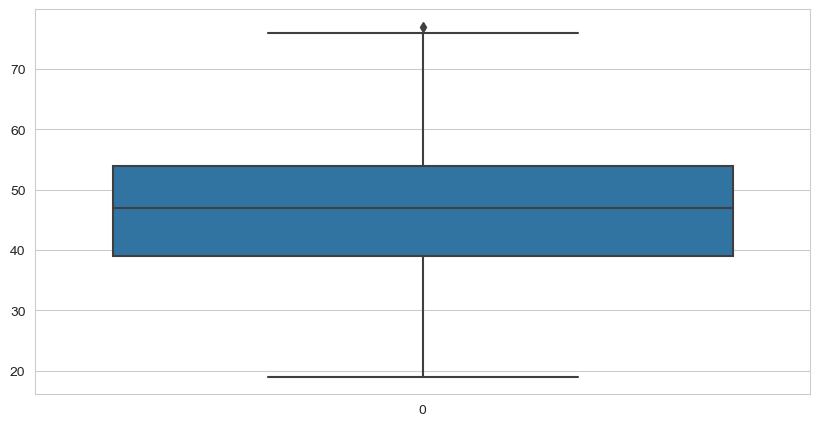


Outliers of Age
-----------------------------
Quartile 1: 39.0
Quartile 3: 54.0
Interquartile Range (IQR): 15.0

Outliers detection from interquartile range (IQR) of Age
-----------------------------
Lower bound:  16.5
Upper bound:  76.5
number of outliers in lower: 0
number of outliers in upper: 1
percentage of outliers in lower: 0.0%
percentage of outliers in upper: 0.16260162601626016%
Median: 47.0	Mean: 47.40813008130081	Mode: 46


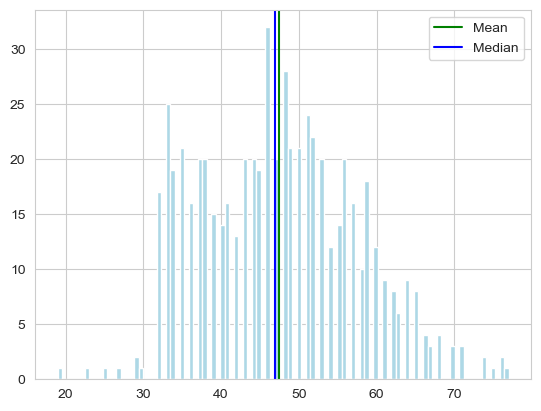


Skewness of Age
-----------------------------
Skewness:  0.2671344915803825

Central value of  Sex
-----------------------------
Mean:  0.6130081300813008
Median:  1.0
Max:  1
Min:  0
Standard deviation:  0.48745823333876814

Boxplot of Sex
-----------------------------


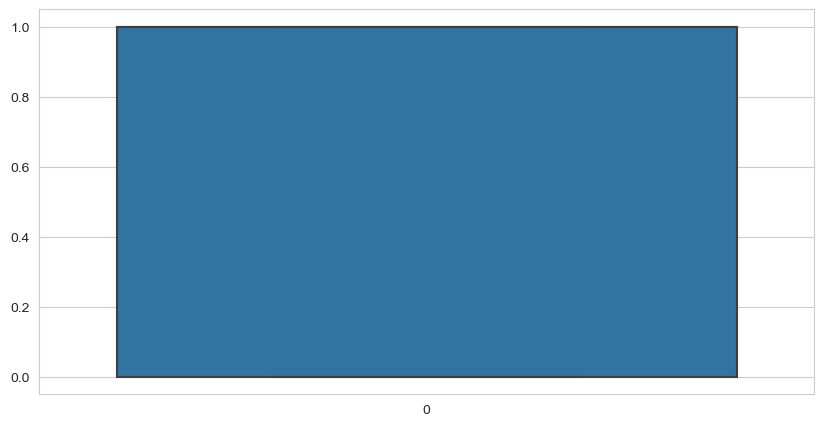


Outliers of Sex
-----------------------------
Quartile 1: 0.0
Quartile 3: 1.0
Interquartile Range (IQR): 1.0

Outliers detection from interquartile range (IQR) of Sex
-----------------------------
Lower bound:  -1.5
Upper bound:  2.5
number of outliers in lower: 0
number of outliers in upper: 0
percentage of outliers in lower: 0.0%
percentage of outliers in upper: 0.0%
Median: 1.0	Mean: 0.6130081300813008	Mode: 1


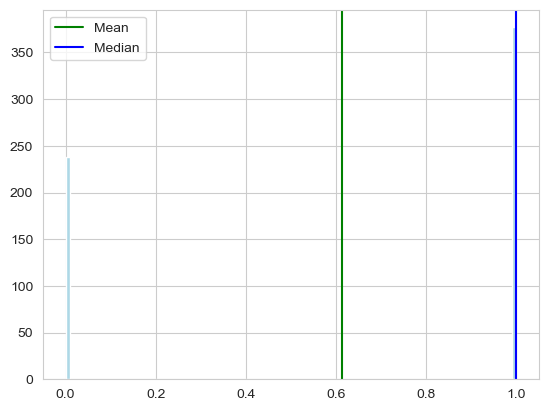


Skewness of Sex
-----------------------------
Skewness:  -0.4651755883164981

Central value of  ALB
-----------------------------
Mean:  41.626770058574095
Median:  42.0
Max:  82.2
Min:  14.9
Standard deviation:  5.77822093155704

Boxplot of ALB
-----------------------------


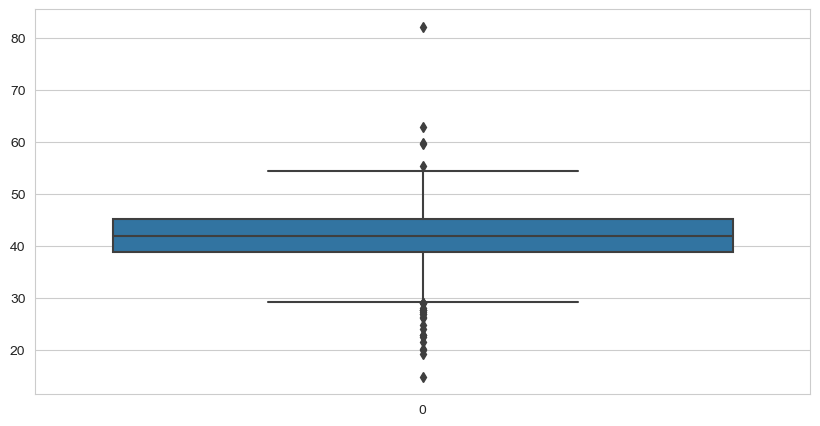


Outliers of ALB
-----------------------------
Quartile 1: 38.8
Quartile 3: 45.25
Interquartile Range (IQR): 6.450000000000003

Outliers detection from interquartile range (IQR) of ALB
-----------------------------
Lower bound:  29.124999999999993
Upper bound:  54.925000000000004
number of outliers in lower: 22
number of outliers in upper: 5
percentage of outliers in lower: 3.5772357723577235%
percentage of outliers in upper: 0.8130081300813008%
Median: 42.0	Mean: 41.626770058574095	Mode: 39.0


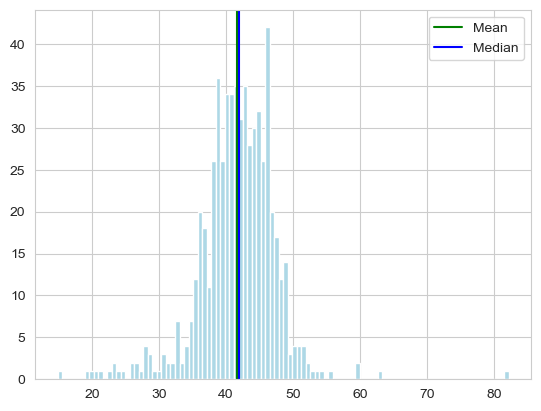


Skewness of ALB
-----------------------------
Skewness:  -0.1795642607226062

Central value of  ALP
-----------------------------
Mean:  68.833129313801
Median:  66.5
Max:  416.6
Min:  11.3
Standard deviation:  25.9767508212314

Boxplot of ALP
-----------------------------


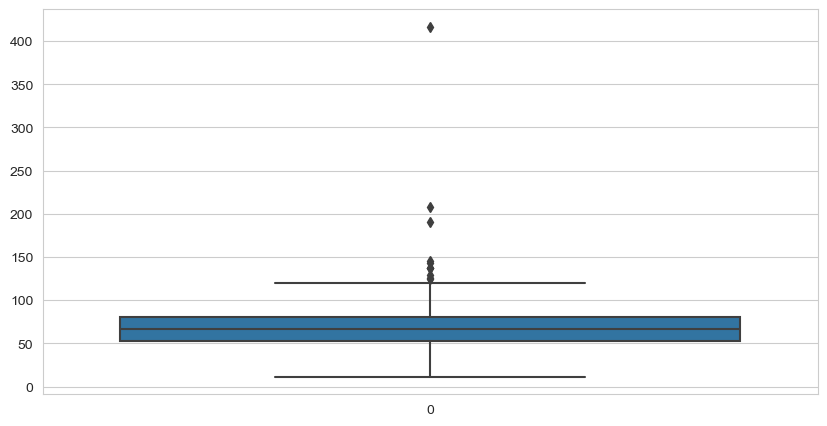


Outliers of ALP
-----------------------------
Quartile 1: 52.95
Quartile 3: 81.0
Interquartile Range (IQR): 28.049999999999997

Outliers detection from interquartile range (IQR) of ALP
-----------------------------
Lower bound:  10.875000000000007
Upper bound:  123.07499999999999
number of outliers in lower: 0
number of outliers in upper: 11
percentage of outliers in lower: 0.0%
percentage of outliers in upper: 1.7886178861788617%
Median: 66.5	Mean: 68.833129313801	Mode: 52.5


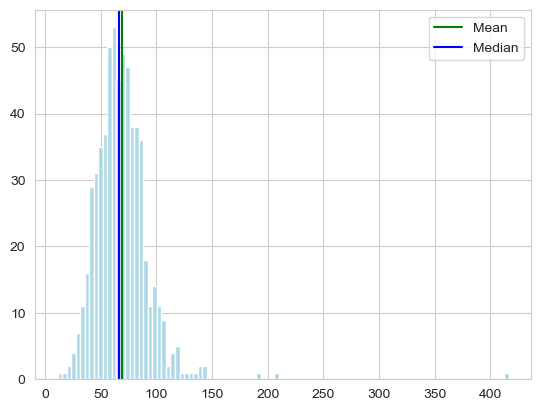


Skewness of ALP
-----------------------------
Skewness:  4.5210067995339145

Central value of  ALT
-----------------------------
Mean:  28.44102887545549
Median:  23.0
Max:  325.3
Min:  0.9
Standard deviation:  25.450096558200755

Boxplot of ALT
-----------------------------


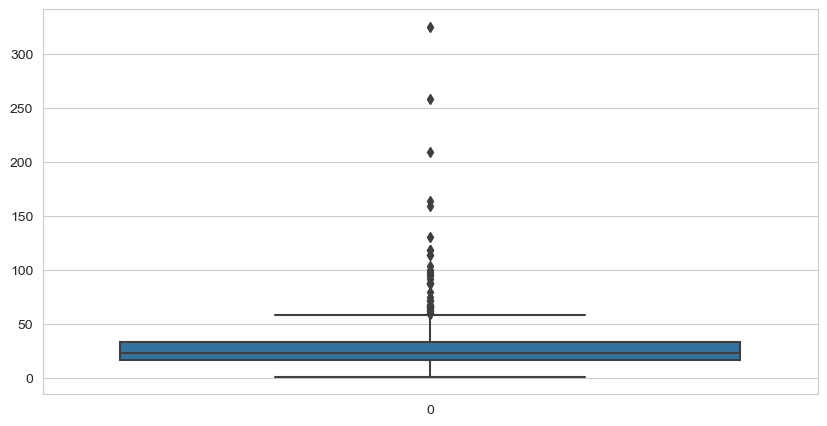


Outliers of ALT
-----------------------------
Quartile 1: 16.4
Quartile 3: 33.05
Interquartile Range (IQR): 16.65

Outliers detection from interquartile range (IQR) of ALT
-----------------------------
Lower bound:  -8.575
Upper bound:  58.02499999999999
number of outliers in lower: 0
number of outliers in upper: 36
percentage of outliers in lower: 0.0%
percentage of outliers in upper: 5.853658536585366%
Median: 23.0	Mean: 28.44102887545549	Mode: 16.6


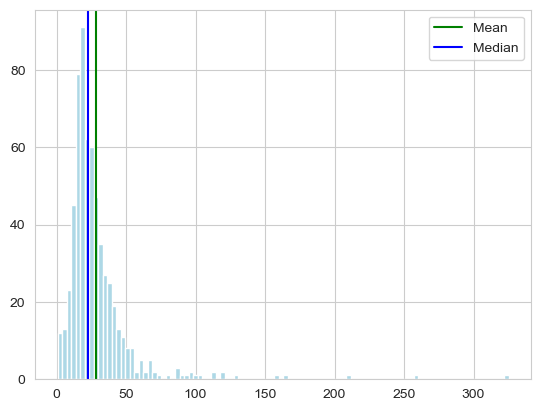


Skewness of ALT
-----------------------------
Skewness:  5.510957678692404

Central value of  AST
-----------------------------
Mean:  34.78634146341463
Median:  25.9
Max:  324.0
Min:  10.6
Standard deviation:  33.090690338551575

Boxplot of AST
-----------------------------


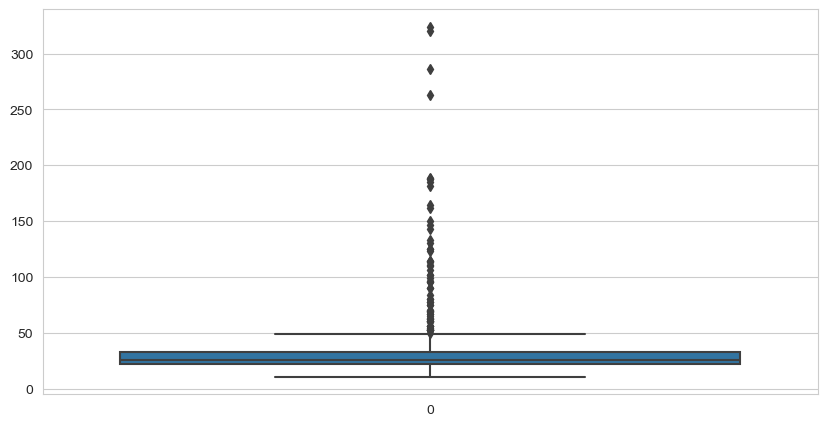


Outliers of AST
-----------------------------
Quartile 1: 21.6
Quartile 3: 32.9
Interquartile Range (IQR): 11.299999999999997

Outliers detection from interquartile range (IQR) of AST
-----------------------------
Lower bound:  4.650000000000006
Upper bound:  49.849999999999994
number of outliers in lower: 0
number of outliers in upper: 64
percentage of outliers in lower: 0.0%
percentage of outliers in upper: 10.40650406504065%
Median: 25.9	Mean: 34.78634146341463	Mode: 22.0


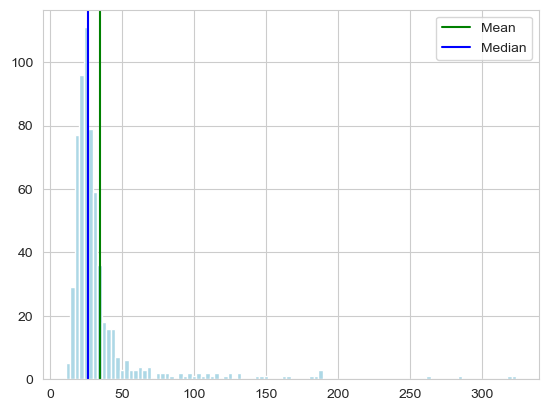


Skewness of AST
-----------------------------
Skewness:  4.940326985589485

Central value of  BIL
-----------------------------
Mean:  11.396747967479675
Median:  7.3
Max:  254.0
Min:  0.8
Standard deviation:  19.673149805846588

Boxplot of BIL
-----------------------------


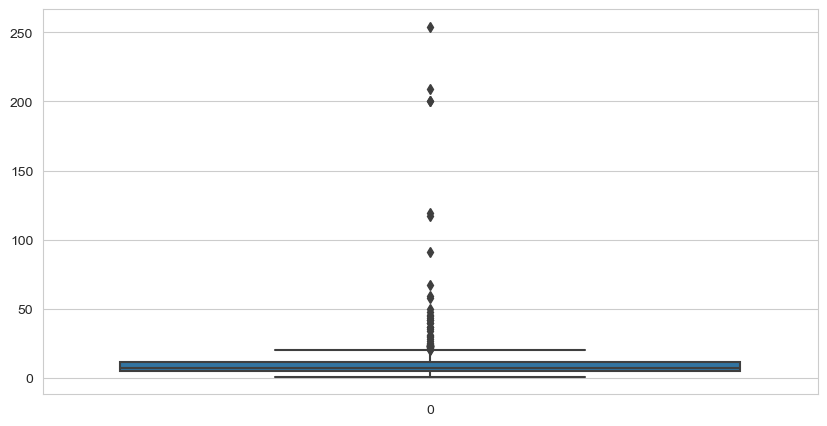


Outliers of BIL
-----------------------------
Quartile 1: 5.3
Quartile 3: 11.2
Interquartile Range (IQR): 5.8999999999999995

Outliers detection from interquartile range (IQR) of BIL
-----------------------------
Lower bound:  -3.55
Upper bound:  20.049999999999997
number of outliers in lower: 0
number of outliers in upper: 47
percentage of outliers in lower: 0.0%
percentage of outliers in upper: 7.642276422764228%
Median: 7.3	Mean: 11.396747967479675	Mode: 6.0


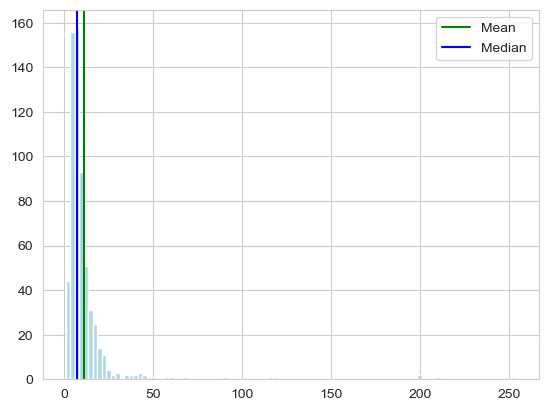


Skewness of BIL
-----------------------------
Skewness:  8.385436707897524

Central value of  CHE
-----------------------------
Mean:  8.196634146341465
Median:  8.26
Max:  16.41
Min:  1.42
Standard deviation:  2.2056572704292936

Boxplot of CHE
-----------------------------


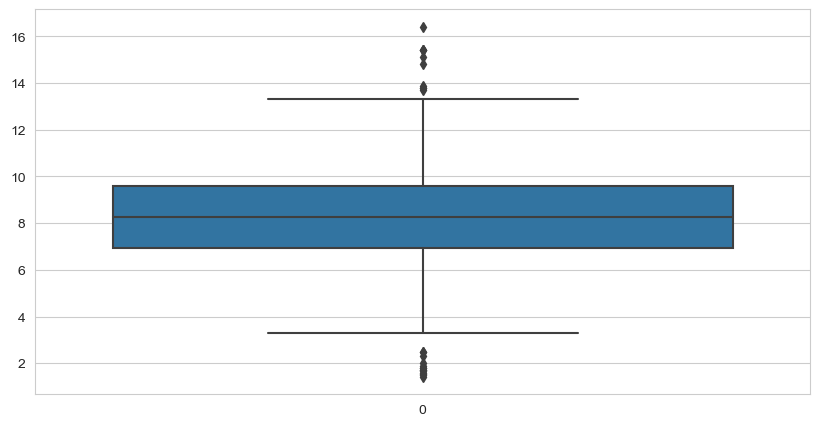


Outliers of CHE
-----------------------------
Quartile 1: 6.9350000000000005
Quartile 3: 9.59
Interquartile Range (IQR): 2.6549999999999994

Outliers detection from interquartile range (IQR) of CHE
-----------------------------
Lower bound:  2.9525000000000015
Upper bound:  13.572499999999998
number of outliers in lower: 14
number of outliers in upper: 10
percentage of outliers in lower: 2.2764227642276422%
percentage of outliers in upper: 1.6260162601626016%
Median: 8.26	Mean: 8.196634146341465	Mode: 7.52


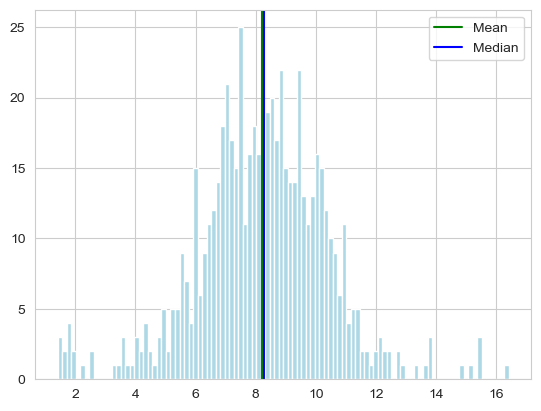


Skewness of CHE
-----------------------------
Skewness:  -0.11023271035660376

Central value of  CHOL
-----------------------------
Mean:  5.370114839989085
Median:  5.3
Max:  9.67
Min:  1.43
Standard deviation:  1.1243309493348386

Boxplot of CHOL
-----------------------------


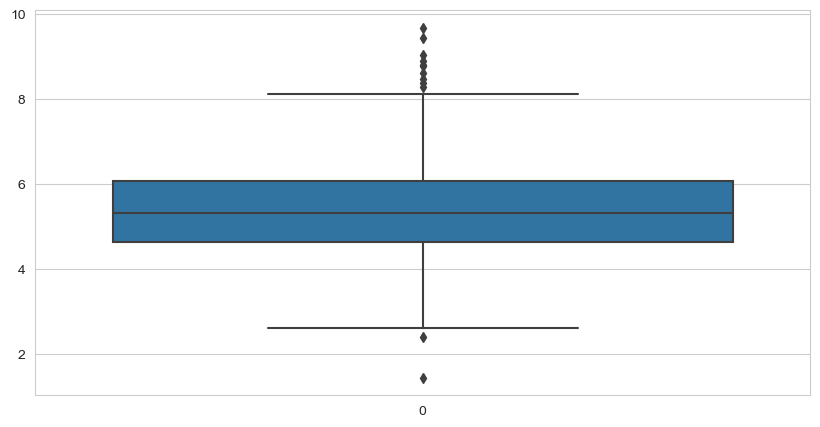


Outliers of CHOL
-----------------------------
Quartile 1: 4.62
Quartile 3: 6.055
Interquartile Range (IQR): 1.4349999999999996

Outliers detection from interquartile range (IQR) of CHOL
-----------------------------
Lower bound:  2.4675000000000007
Upper bound:  8.2075
number of outliers in lower: 2
number of outliers in upper: 10
percentage of outliers in lower: 0.3252032520325203%
percentage of outliers in upper: 1.6260162601626016%
Median: 5.3	Mean: 5.370114839989085	Mode: 5.07


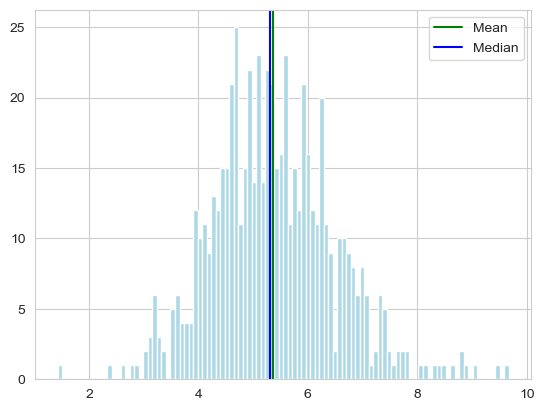


Skewness of CHOL
-----------------------------
Skewness:  0.37257680503189705

Central value of  CREA
-----------------------------
Mean:  81.28780487804877
Median:  77.0
Max:  1079.1
Min:  8.0
Standard deviation:  49.75616601234977

Boxplot of CREA
-----------------------------


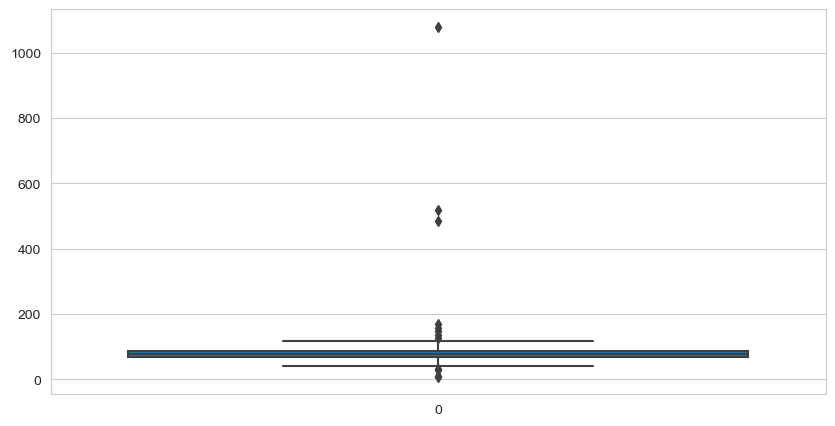


Outliers of CREA
-----------------------------
Quartile 1: 67.0
Quartile 3: 88.0
Interquartile Range (IQR): 21.0

Outliers detection from interquartile range (IQR) of CREA
-----------------------------
Lower bound:  35.5
Upper bound:  119.5
number of outliers in lower: 4
number of outliers in upper: 8
percentage of outliers in lower: 0.6504065040650406%
percentage of outliers in upper: 1.3008130081300813%
Median: 77.0	Mean: 81.28780487804877	Mode: 74.0


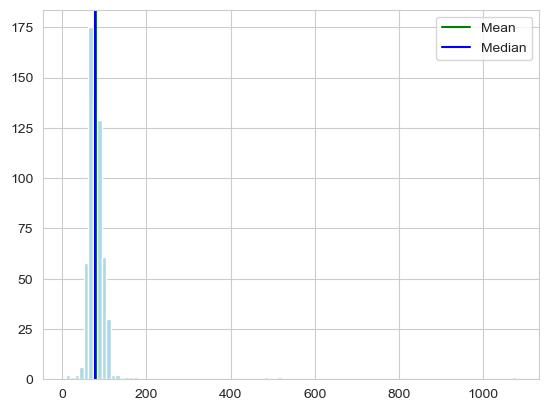


Skewness of CREA
-----------------------------
Skewness:  15.169291145044488

Central value of  GGT
-----------------------------
Mean:  39.53317073170732
Median:  23.3
Max:  650.9
Min:  4.5
Standard deviation:  54.66107123891246

Boxplot of GGT
-----------------------------


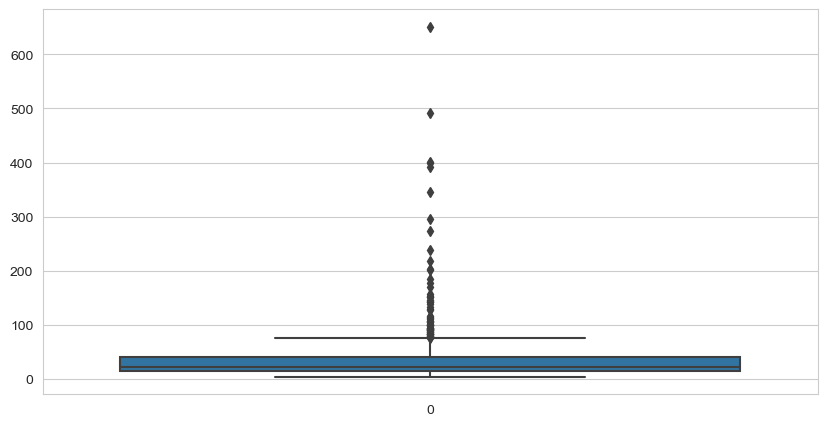


Outliers of GGT
-----------------------------
Quartile 1: 15.7
Quartile 3: 40.2
Interquartile Range (IQR): 24.500000000000004

Outliers detection from interquartile range (IQR) of GGT
-----------------------------
Lower bound:  -21.050000000000008
Upper bound:  76.95000000000002
number of outliers in lower: 0
number of outliers in upper: 65
percentage of outliers in lower: 0.0%
percentage of outliers in upper: 10.56910569105691%
Median: 23.3	Mean: 39.53317073170732	Mode: 13.0


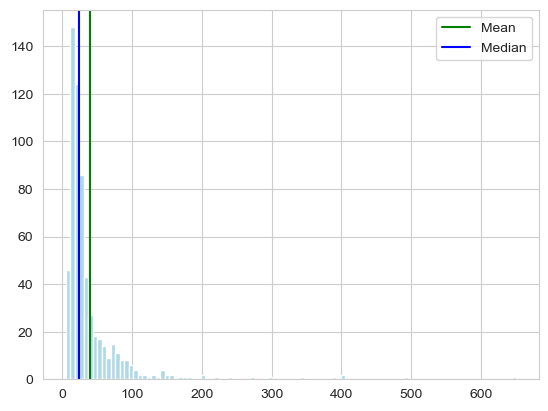


Skewness of GGT
-----------------------------
Skewness:  5.632734058440102

Central value of  PROT
-----------------------------
Mean:  72.02686950039778
Median:  72.2
Max:  90.0
Min:  44.8
Standard deviation:  5.415191872893626

Boxplot of PROT
-----------------------------


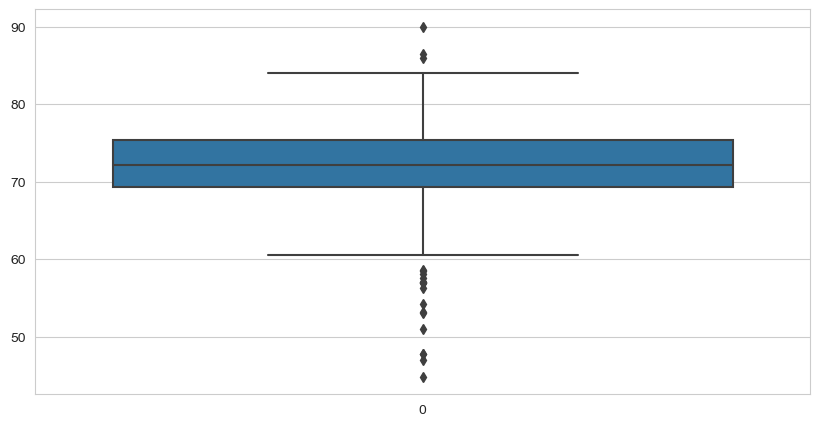


Outliers of PROT
-----------------------------
Quartile 1: 69.3
Quartile 3: 75.4
Interquartile Range (IQR): 6.1000000000000085

Outliers detection from interquartile range (IQR) of PROT
-----------------------------
Lower bound:  60.149999999999984
Upper bound:  84.55000000000001
number of outliers in lower: 17
number of outliers in upper: 3
percentage of outliers in lower: 2.7642276422764227%
percentage of outliers in upper: 0.4878048780487805%
Median: 72.2	Mean: 72.02686950039778	Mode: 71.9


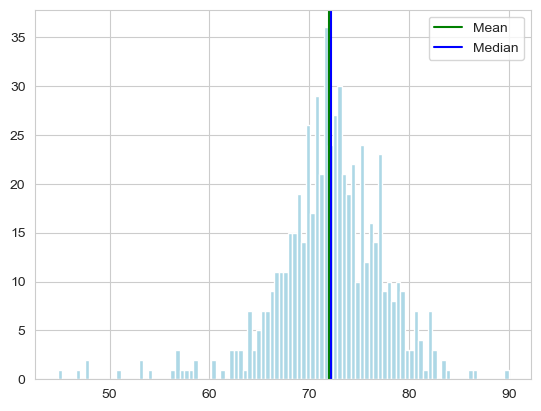


Skewness of PROT
-----------------------------
Skewness:  -0.9581611085827311


In [70]:
df_num = data.select_dtypes(include=['float64', 'int64'])

for col in df_num.columns:
    univariateAnalysis_(col, data)

**Mencoba drop nilai outliers**

In [71]:
def drop_outliers(df, column):
    q1 = df[column].quantile(q=0.25)
    q3 = df[column].quantile(q=0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    return data[column][(data[column] > lower_bound) & (data[column] < upper_bound)]

In [72]:
data2 = data.copy()

for col in df_num.columns:
    data2[col] = drop_outliers(data2, col)

In [73]:
data2

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,32.0,1,38.5,52.500000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0=Blood Donor
1,32.0,1,38.5,70.300000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0=Blood Donor
2,32.0,1,46.9,74.700000,36.2,NaN,6.1,8.84,5.20,86.0,33.2,79.3,0=Blood Donor
3,32.0,1,43.2,52.000000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0=Blood Donor
4,32.0,1,39.2,74.100000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0=Blood Donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,62.0,0,32.0,NaN,5.9,NaN,NaN,5.57,6.30,55.7,NaN,68.5,3=Cirrhosis
611,64.0,0,NaN,102.800000,2.9,44.4,20.0,NaN,3.02,63.0,35.9,71.3,3=Cirrhosis
612,64.0,0,NaN,87.300000,3.5,NaN,NaN,NaN,3.63,66.7,64.2,82.0,3=Cirrhosis
613,46.0,0,33.0,76.287690,39.0,NaN,20.0,3.56,4.20,52.0,50.0,71.0,3=Cirrhosis


**Melakukan drop baris**

In [74]:
data2.dropna(inplace=True)

In [75]:
data2

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,32.0,1,38.5,52.500000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0=Blood Donor
1,32.0,1,38.5,70.300000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0=Blood Donor
3,32.0,1,43.2,52.000000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0=Blood Donor
4,32.0,1,39.2,74.100000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0=Blood Donor
6,32.0,1,46.3,41.300000,17.5,17.8,8.5,7.01,4.79,70.0,16.9,74.5,0=Blood Donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,50.0,0,40.0,32.700000,9.0,46.0,10.0,7.51,4.67,56.6,22.3,70.1,1=Hepatitis
575,64.0,1,38.0,35.700000,7.1,41.3,13.0,7.10,4.52,70.0,53.0,66.8,2=Fibrosis
579,57.0,0,43.0,52.100000,8.3,35.8,18.0,8.61,6.19,71.4,27.9,82.0,2=Fibrosis
580,68.0,0,43.0,22.900000,5.0,42.1,12.0,7.29,4.89,80.9,11.9,76.1,2=Fibrosis


In [96]:
data2.describe()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,46.975501,0.556793,42.178619,66.037241,23.518781,25.234521,7.635412,8.298731,5.444902,77.933630,23.985746,72.250780
std,9.439035,0.497318,4.173057,17.827748,10.138572,6.515770,3.841005,1.678421,0.950168,13.525424,14.024857,4.132029
min,27.000000,0.000000,31.400000,22.900000,2.500000,12.000000,1.800000,3.900000,2.860000,41.000000,4.500000,60.500000
25%,39.000000,0.000000,39.200000,52.900000,16.300000,20.700000,5.000000,7.100000,4.720000,68.000000,14.500000,69.800000
50%,47.000000,1.000000,42.100000,64.800000,21.000000,24.300000,6.800000,8.290000,5.370000,76.000000,19.900000,72.000000
75%,53.000000,1.000000,45.200000,77.700000,28.900000,28.900000,9.400000,9.460000,6.060000,88.000000,28.100000,75.100000
max,70.000000,1.000000,54.400000,120.200000,55.900000,48.400000,19.700000,12.860000,7.800000,114.000000,76.900000,83.400000


In [76]:
data2.drop('Category', axis=1, inplace=True)


Central value of  Age
-----------------------------
Mean:  46.97550111358574
Median:  47.0
Max:  70.0
Min:  27.0
Standard deviation:  9.439034940485156

Boxplot of Age
-----------------------------


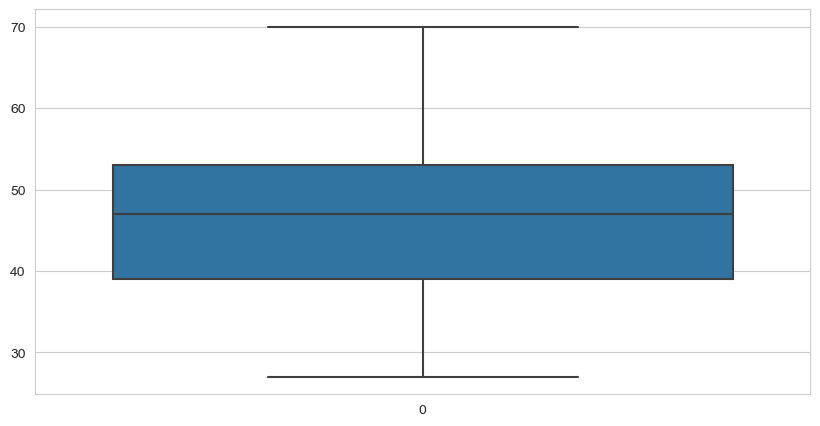


Outliers of Age
-----------------------------
Quartile 1: 39.0
Quartile 3: 53.0
Interquartile Range (IQR): 14.0

Outliers detection from interquartile range (IQR) of Age
-----------------------------
Lower bound:  18.0
Upper bound:  74.0
number of outliers in lower: 0
number of outliers in upper: 0
percentage of outliers in lower: 0.0%
percentage of outliers in upper: 0.0%
Median: 47.0	Mean: 46.97550111358574	Mode: 46.0


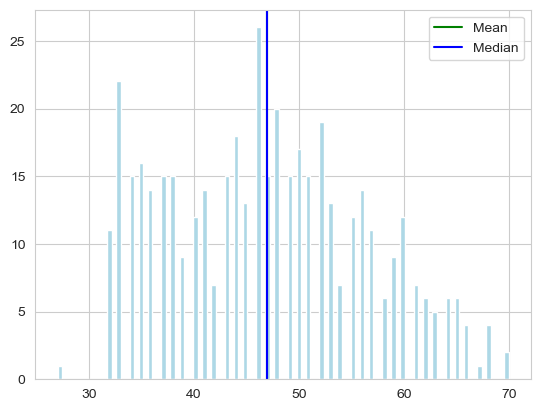


Skewness of Age
-----------------------------
Skewness:  0.22844989535475402

Central value of  Sex
-----------------------------
Mean:  0.5567928730512249
Median:  1.0
Max:  1
Min:  0
Standard deviation:  0.497318213685541

Boxplot of Sex
-----------------------------


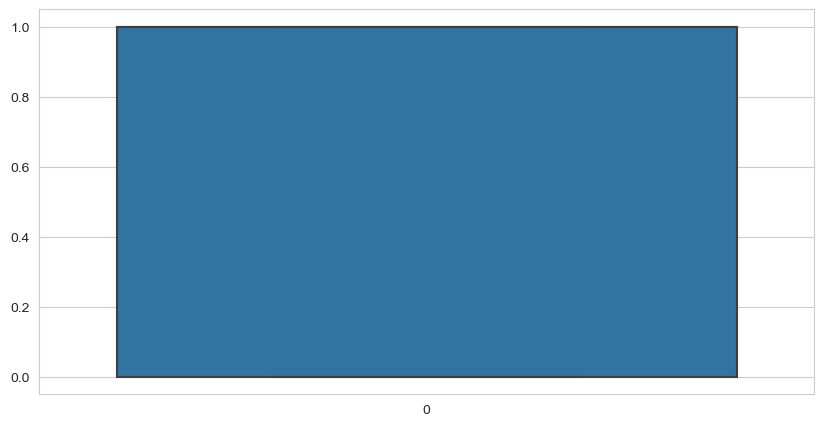


Outliers of Sex
-----------------------------
Quartile 1: 0.0
Quartile 3: 1.0
Interquartile Range (IQR): 1.0

Outliers detection from interquartile range (IQR) of Sex
-----------------------------
Lower bound:  -1.5
Upper bound:  2.5
number of outliers in lower: 0
number of outliers in upper: 0
percentage of outliers in lower: 0.0%
percentage of outliers in upper: 0.0%
Median: 1.0	Mean: 0.5567928730512249	Mode: 1


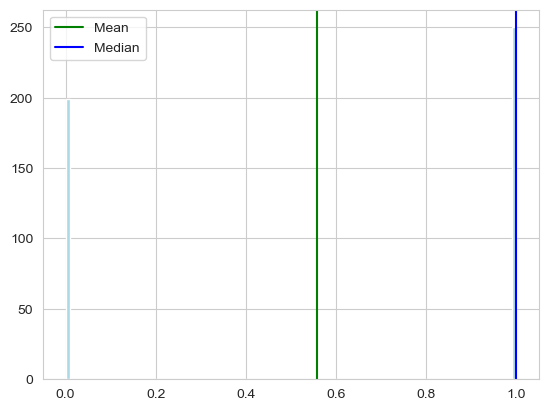


Skewness of Sex
-----------------------------
Skewness:  -0.2294184218309885

Central value of  ALB
-----------------------------
Mean:  42.17861915367482
Median:  42.1
Max:  54.4
Min:  31.4
Standard deviation:  4.173057381637096

Boxplot of ALB
-----------------------------


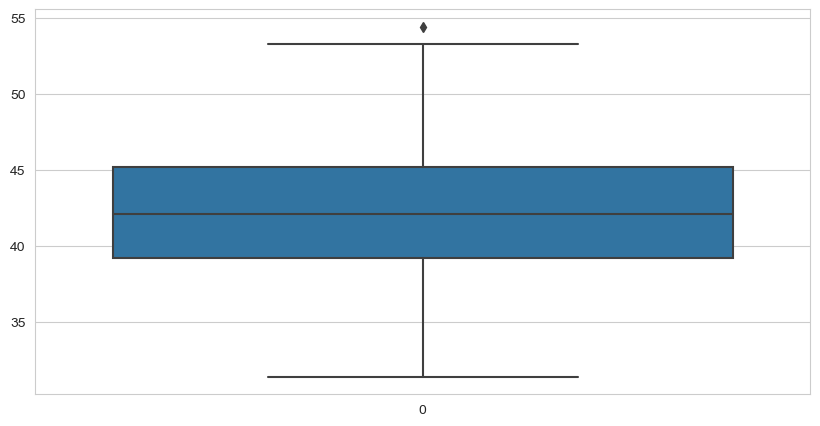


Outliers of ALB
-----------------------------
Quartile 1: 39.2
Quartile 3: 45.2
Interquartile Range (IQR): 6.0

Outliers detection from interquartile range (IQR) of ALB
-----------------------------
Lower bound:  30.200000000000003
Upper bound:  54.2
number of outliers in lower: 0
number of outliers in upper: 1
percentage of outliers in lower: 0.0%
percentage of outliers in upper: 0.16260162601626016%
Median: 42.1	Mean: 42.17861915367482	Mode: 39.9


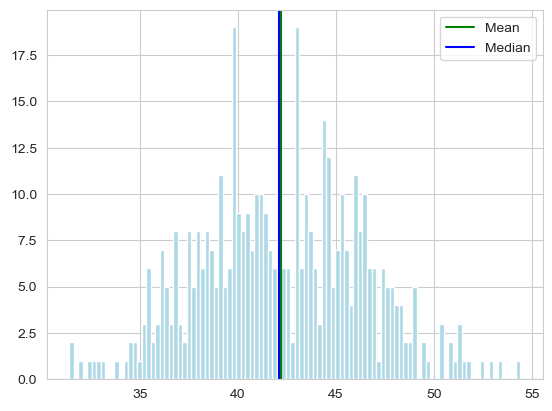


Skewness of ALB
-----------------------------
Skewness:  0.0787780849393574

Central value of  ALP
-----------------------------
Mean:  66.0372414133787
Median:  64.8
Max:  120.2
Min:  22.9
Standard deviation:  17.827748136250584

Boxplot of ALP
-----------------------------


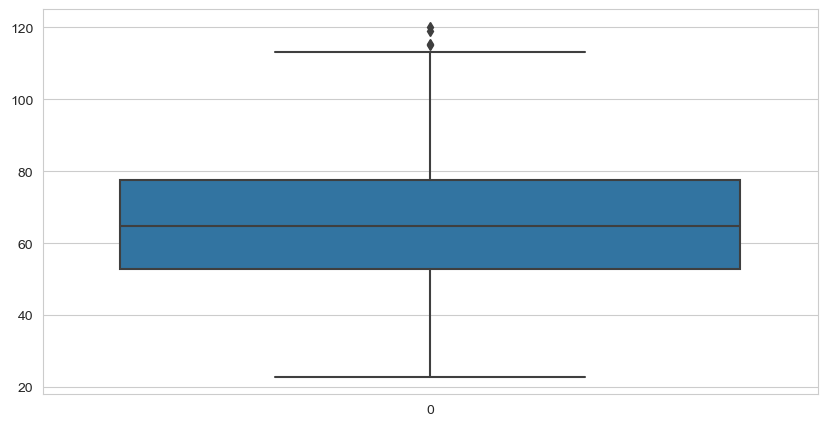


Outliers of ALP
-----------------------------
Quartile 1: 52.9
Quartile 3: 77.7
Interquartile Range (IQR): 24.800000000000004

Outliers detection from interquartile range (IQR) of ALP
-----------------------------
Lower bound:  15.699999999999996
Upper bound:  114.9
number of outliers in lower: 0
number of outliers in upper: 4
percentage of outliers in lower: 0.0%
percentage of outliers in upper: 0.6504065040650406%
Median: 64.8	Mean: 66.0372414133787	Mode: 52.5


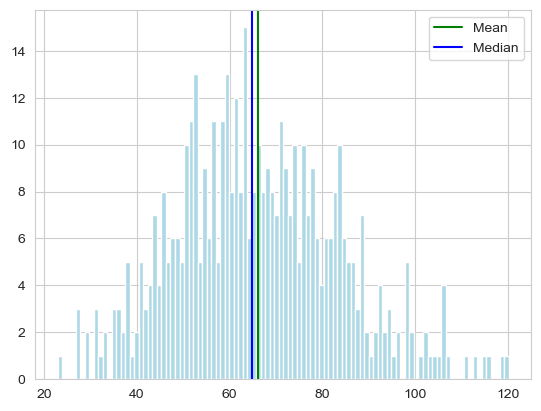


Skewness of ALP
-----------------------------
Skewness:  0.30285436730225196

Central value of  ALT
-----------------------------
Mean:  23.518781199120557
Median:  21.0
Max:  55.9
Min:  2.5
Standard deviation:  10.13857232166677

Boxplot of ALT
-----------------------------


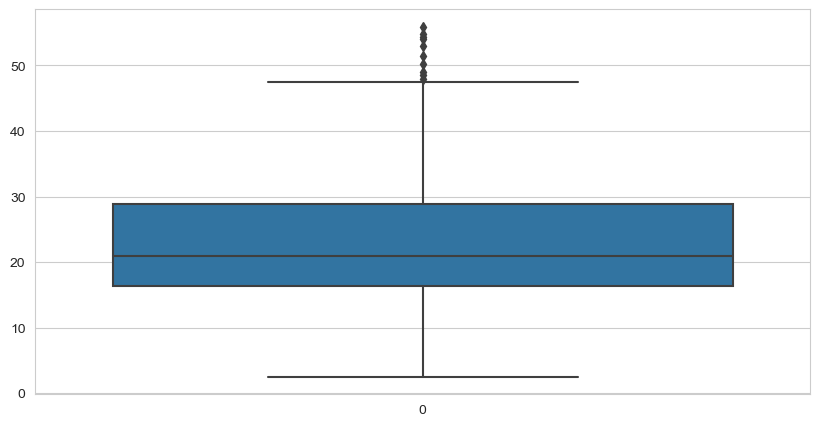


Outliers of ALT
-----------------------------
Quartile 1: 16.3
Quartile 3: 28.9
Interquartile Range (IQR): 12.599999999999998

Outliers detection from interquartile range (IQR) of ALT
-----------------------------
Lower bound:  -2.599999999999998
Upper bound:  47.8
number of outliers in lower: 0
number of outliers in upper: 10
percentage of outliers in lower: 0.0%
percentage of outliers in upper: 1.6260162601626016%
Median: 21.0	Mean: 23.518781199120557	Mode: 16.6


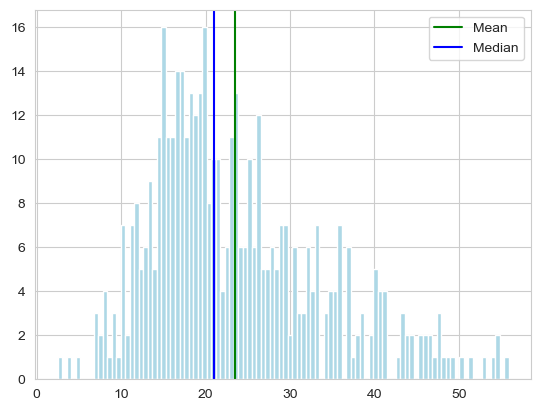


Skewness of ALT
-----------------------------
Skewness:  0.8449891400788585

Central value of  AST
-----------------------------
Mean:  25.234521158129173
Median:  24.3
Max:  48.4
Min:  12.0
Standard deviation:  6.515769833444919

Boxplot of AST
-----------------------------


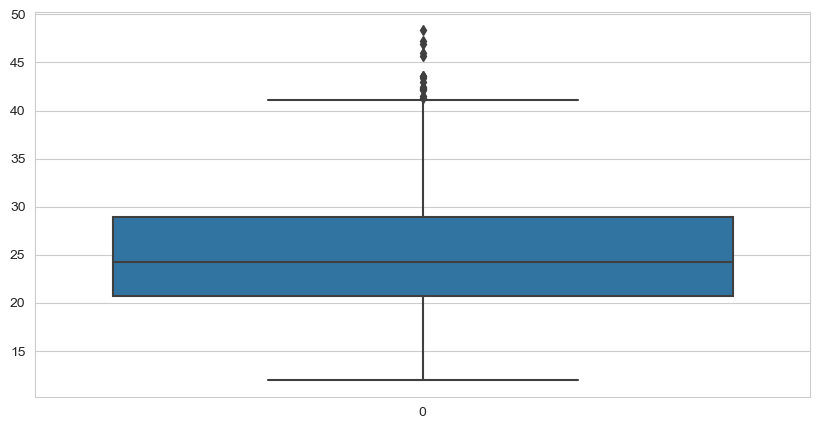


Outliers of AST
-----------------------------
Quartile 1: 20.7
Quartile 3: 28.9
Interquartile Range (IQR): 8.2

Outliers detection from interquartile range (IQR) of AST
-----------------------------
Lower bound:  8.4
Upper bound:  41.199999999999996
number of outliers in lower: 0
number of outliers in upper: 15
percentage of outliers in lower: 0.0%
percentage of outliers in upper: 2.4390243902439024%
Median: 24.3	Mean: 25.234521158129173	Mode: 22.0


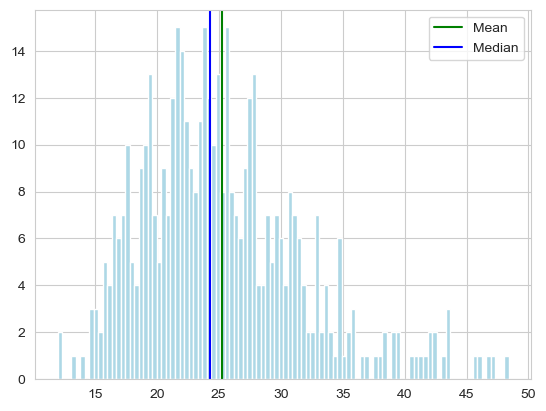


Skewness of AST
-----------------------------
Skewness:  0.8819371532367095

Central value of  BIL
-----------------------------
Mean:  7.635412026726058
Median:  6.8
Max:  19.7
Min:  1.8
Standard deviation:  3.841004957310938

Boxplot of BIL
-----------------------------


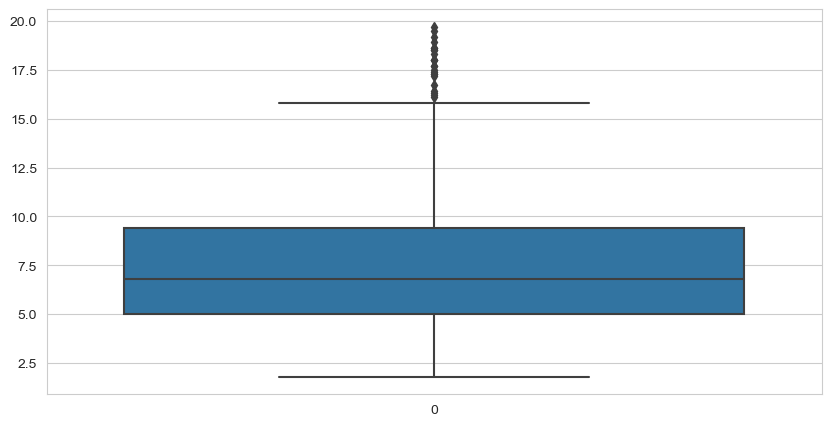


Outliers of BIL
-----------------------------
Quartile 1: 5.0
Quartile 3: 9.4
Interquartile Range (IQR): 4.4

Outliers detection from interquartile range (IQR) of BIL
-----------------------------
Lower bound:  -1.6000000000000005
Upper bound:  16.0
number of outliers in lower: 0
number of outliers in upper: 24
percentage of outliers in lower: 0.0%
percentage of outliers in upper: 3.902439024390244%
Median: 6.8	Mean: 7.635412026726058	Mode: 3.7


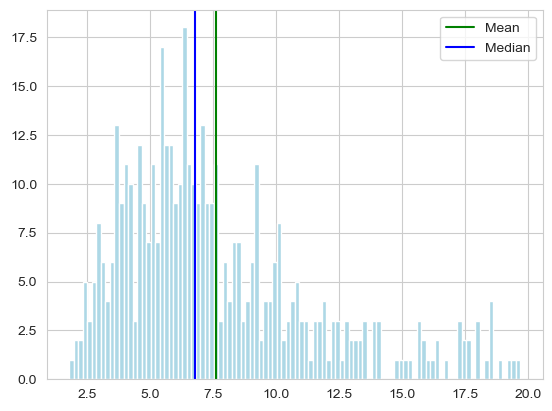


Skewness of BIL
-----------------------------
Skewness:  1.1135743795918547

Central value of  CHE
-----------------------------
Mean:  8.298730512249444
Median:  8.29
Max:  12.86
Min:  3.9
Standard deviation:  1.6784209312039486

Boxplot of CHE
-----------------------------


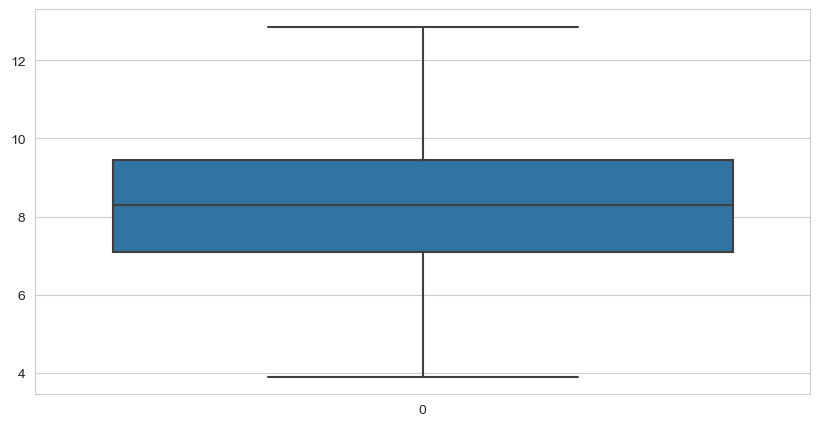


Outliers of CHE
-----------------------------
Quartile 1: 7.1
Quartile 3: 9.46
Interquartile Range (IQR): 2.360000000000001

Outliers detection from interquartile range (IQR) of CHE
-----------------------------
Lower bound:  3.559999999999998
Upper bound:  13.000000000000004
number of outliers in lower: 0
number of outliers in upper: 0
percentage of outliers in lower: 0.0%
percentage of outliers in upper: 0.0%
Median: 8.29	Mean: 8.298730512249444	Mode: 7.52


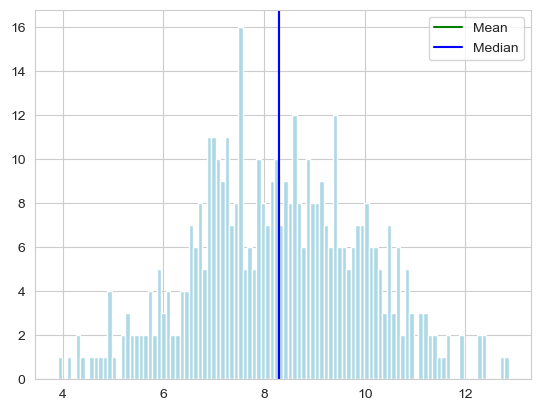


Skewness of CHE
-----------------------------
Skewness:  0.018070204625036515

Central value of  CHOL
-----------------------------
Mean:  5.444902202129967
Median:  5.37
Max:  7.8
Min:  2.86
Standard deviation:  0.9501680730941052

Boxplot of CHOL
-----------------------------


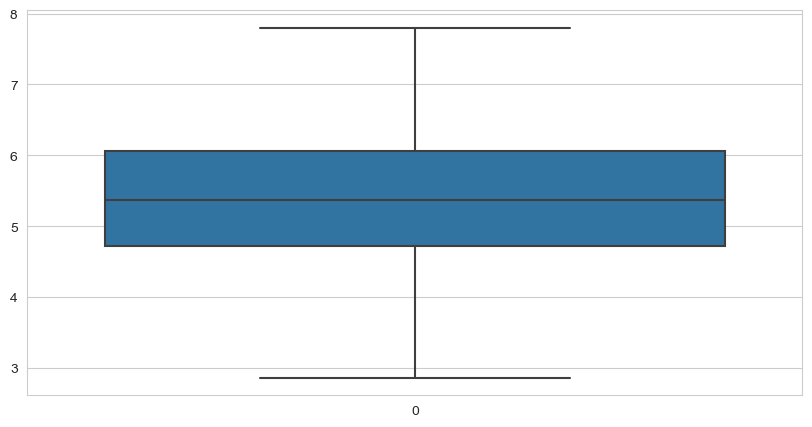


Outliers of CHOL
-----------------------------
Quartile 1: 4.72
Quartile 3: 6.06
Interquartile Range (IQR): 1.3399999999999999

Outliers detection from interquartile range (IQR) of CHOL
-----------------------------
Lower bound:  2.71
Upper bound:  8.07
number of outliers in lower: 0
number of outliers in upper: 0
percentage of outliers in lower: 0.0%
percentage of outliers in upper: 0.0%
Median: 5.37	Mean: 5.444902202129967	Mode: 5.07


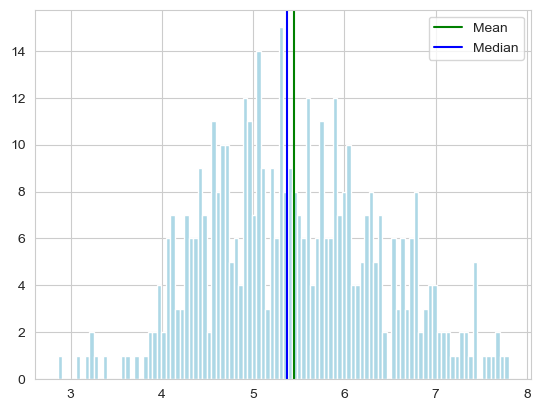


Skewness of CHOL
-----------------------------
Skewness:  0.16643401483126308

Central value of  CREA
-----------------------------
Mean:  77.93363028953229
Median:  76.0
Max:  114.0
Min:  41.0
Standard deviation:  13.525424321854878

Boxplot of CREA
-----------------------------


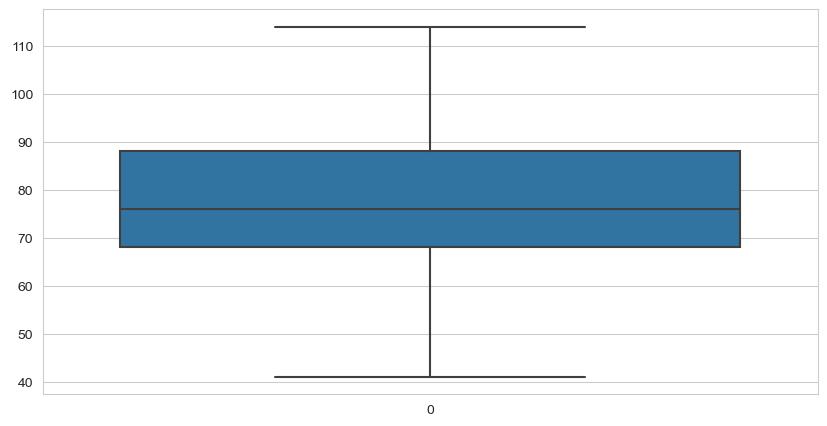


Outliers of CREA
-----------------------------
Quartile 1: 68.0
Quartile 3: 88.0
Interquartile Range (IQR): 20.0

Outliers detection from interquartile range (IQR) of CREA
-----------------------------
Lower bound:  38.0
Upper bound:  118.0
number of outliers in lower: 0
number of outliers in upper: 0
percentage of outliers in lower: 0.0%
percentage of outliers in upper: 0.0%
Median: 76.0	Mean: 77.93363028953229	Mode: 74.0


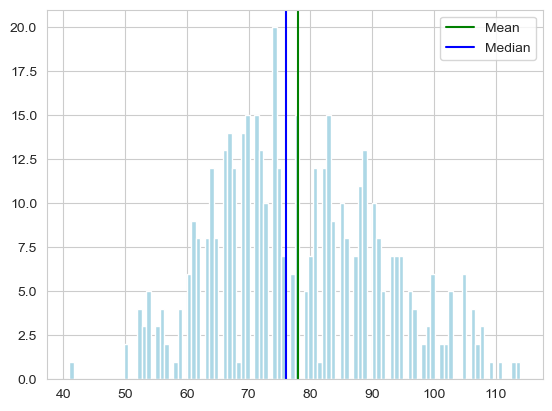


Skewness of CREA
-----------------------------
Skewness:  0.26847134570525344

Central value of  GGT
-----------------------------
Mean:  23.985746102449884
Median:  19.9
Max:  76.9
Min:  4.5
Standard deviation:  14.024857458456935

Boxplot of GGT
-----------------------------


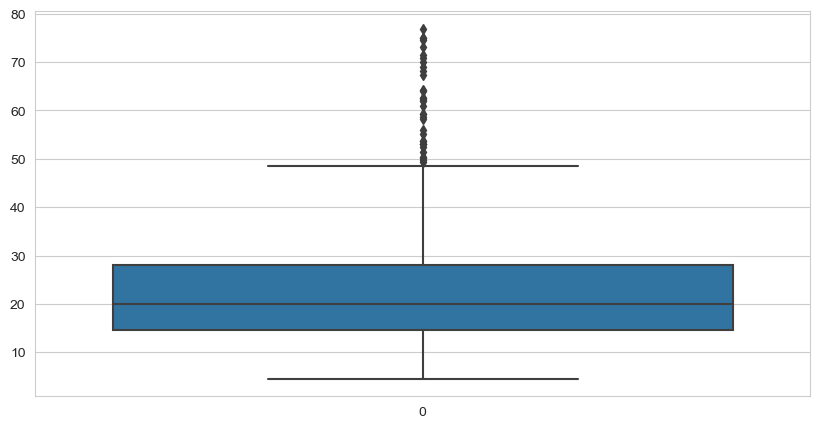


Outliers of GGT
-----------------------------
Quartile 1: 14.5
Quartile 3: 28.1
Interquartile Range (IQR): 13.600000000000001

Outliers detection from interquartile range (IQR) of GGT
-----------------------------
Lower bound:  -5.900000000000002
Upper bound:  48.5
number of outliers in lower: 0
number of outliers in upper: 35
percentage of outliers in lower: 0.0%
percentage of outliers in upper: 5.691056910569106%
Median: 19.9	Mean: 23.985746102449884	Mode: 19.1


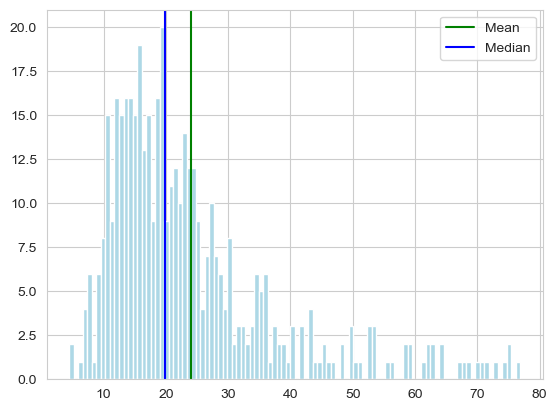


Skewness of GGT
-----------------------------
Skewness:  1.647843119731746

Central value of  PROT
-----------------------------
Mean:  72.25077951002227
Median:  72.0
Max:  83.4
Min:  60.5
Standard deviation:  4.132029245497986

Boxplot of PROT
-----------------------------


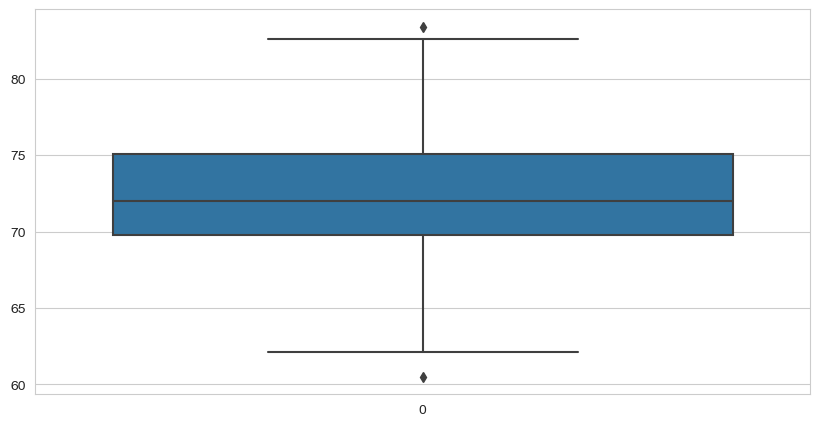


Outliers of PROT
-----------------------------
Quartile 1: 69.8
Quartile 3: 75.1
Interquartile Range (IQR): 5.299999999999997

Outliers detection from interquartile range (IQR) of PROT
-----------------------------
Lower bound:  61.85
Upper bound:  83.04999999999998
number of outliers in lower: 1
number of outliers in upper: 1
percentage of outliers in lower: 0.16260162601626016%
percentage of outliers in upper: 0.16260162601626016%
Median: 72.0	Mean: 72.25077951002227	Mode: 71.9


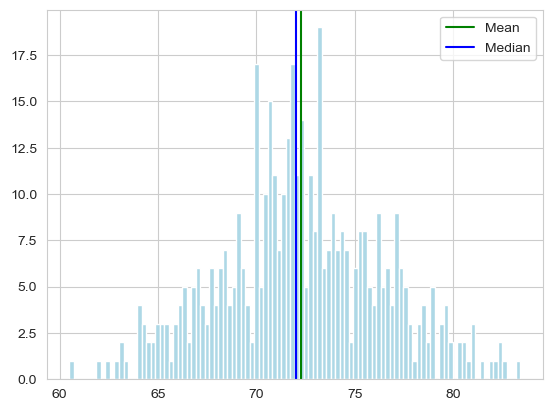


Skewness of PROT
-----------------------------
Skewness:  0.04793649535607963


In [77]:
for col in data2.columns:
    univariateAnalysis_(col,data2)

**Mencoba imputasi np.nan dengan nilai median**

In [89]:
data3 = data.copy()
data3.drop('Category', axis=1, inplace=True)

In [90]:
for col in df_num.columns:
    data3[col] = drop_outliers(data3, col)

In [91]:
data3

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32.0,1,38.5,52.500000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32.0,1,38.5,70.300000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32.0,1,46.9,74.700000,36.2,NaN,6.1,8.84,5.20,86.0,33.2,79.3
3,32.0,1,43.2,52.000000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32.0,1,39.2,74.100000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...
610,62.0,0,32.0,NaN,5.9,NaN,NaN,5.57,6.30,55.7,NaN,68.5
611,64.0,0,NaN,102.800000,2.9,44.4,20.0,NaN,3.02,63.0,35.9,71.3
612,64.0,0,NaN,87.300000,3.5,NaN,NaN,NaN,3.63,66.7,64.2,82.0
613,46.0,0,33.0,76.287690,39.0,NaN,20.0,3.56,4.20,52.0,50.0,71.0


In [92]:
for col in data3.columns:
    data3[col].fillna(data3[col].median(), inplace=True)

In [93]:
data3

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32.0,1,38.50,52.500000,7.7,22.1,7.50,6.93,3.23,106.0,12.10,69.0
1,32.0,1,38.50,70.300000,18.0,24.7,3.90,11.17,4.80,74.0,15.60,76.5
2,32.0,1,46.90,74.700000,36.2,25.0,6.10,8.84,5.20,86.0,33.20,79.3
3,32.0,1,43.20,52.000000,30.6,22.6,18.90,7.33,4.74,80.0,33.80,75.7
4,32.0,1,39.20,74.100000,32.6,24.8,9.60,9.15,4.32,76.0,29.90,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...
610,62.0,0,32.00,66.300000,5.9,25.0,6.95,5.57,6.30,55.7,21.55,68.5
611,64.0,0,42.05,102.800000,2.9,44.4,20.00,8.27,3.02,63.0,35.90,71.3
612,64.0,0,42.05,87.300000,3.5,25.0,6.95,8.27,3.63,66.7,64.20,82.0
613,46.0,0,33.00,76.287690,39.0,25.0,20.00,3.56,4.20,52.0,50.00,71.0



Central value of  Age
-----------------------------
Mean:  47.359349593495935
Median:  47.0
Max:  76.0
Min:  19.0
Standard deviation:  9.983829249432295

Boxplot of Age
-----------------------------


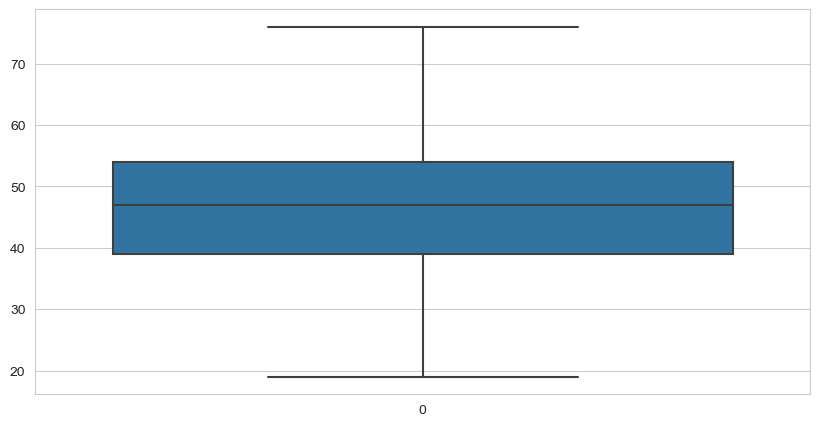


Outliers of Age
-----------------------------
Quartile 1: 39.0
Quartile 3: 54.0
Interquartile Range (IQR): 15.0

Outliers detection from interquartile range (IQR) of Age
-----------------------------
Lower bound:  16.5
Upper bound:  76.5
number of outliers in lower: 0
number of outliers in upper: 0
percentage of outliers in lower: 0.0%
percentage of outliers in upper: 0.0%
Median: 47.0	Mean: 47.359349593495935	Mode: 46.0


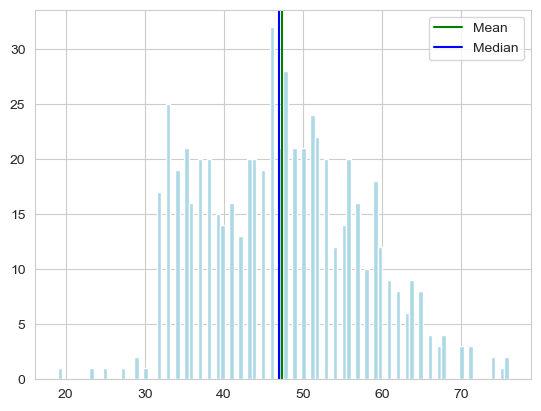


Skewness of Age
-----------------------------
Skewness:  0.24505515784426735

Central value of  Sex
-----------------------------
Mean:  0.6130081300813008
Median:  1.0
Max:  1
Min:  0
Standard deviation:  0.48745823333876814

Boxplot of Sex
-----------------------------


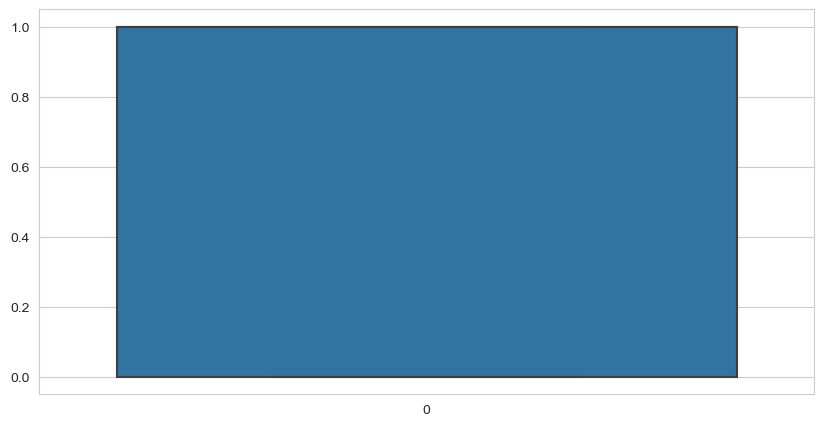


Outliers of Sex
-----------------------------
Quartile 1: 0.0
Quartile 3: 1.0
Interquartile Range (IQR): 1.0

Outliers detection from interquartile range (IQR) of Sex
-----------------------------
Lower bound:  -1.5
Upper bound:  2.5
number of outliers in lower: 0
number of outliers in upper: 0
percentage of outliers in lower: 0.0%
percentage of outliers in upper: 0.0%
Median: 1.0	Mean: 0.6130081300813008	Mode: 1


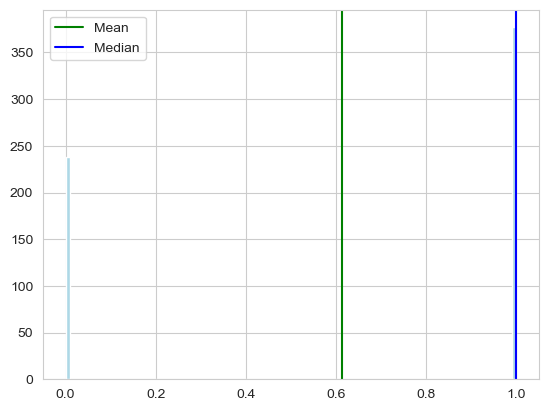


Skewness of Sex
-----------------------------
Skewness:  -0.4651755883164981

Central value of  ALB
-----------------------------
Mean:  42.06506274150093
Median:  42.05
Max:  54.4
Min:  29.2
Standard deviation:  4.216063196217824

Boxplot of ALB
-----------------------------


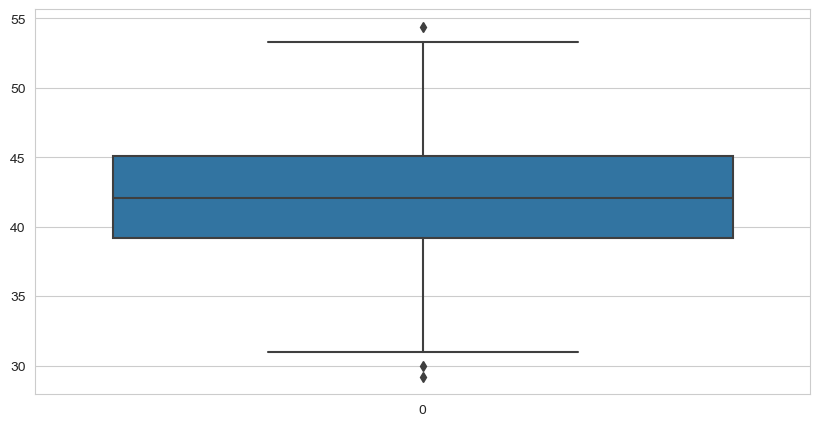


Outliers of ALB
-----------------------------
Quartile 1: 39.2
Quartile 3: 45.1
Interquartile Range (IQR): 5.899999999999999

Outliers detection from interquartile range (IQR) of ALB
-----------------------------
Lower bound:  30.350000000000005
Upper bound:  53.95
number of outliers in lower: 2
number of outliers in upper: 1
percentage of outliers in lower: 0.3252032520325203%
percentage of outliers in upper: 0.16260162601626016%
Median: 42.05	Mean: 42.06506274150093	Mode: 42.05


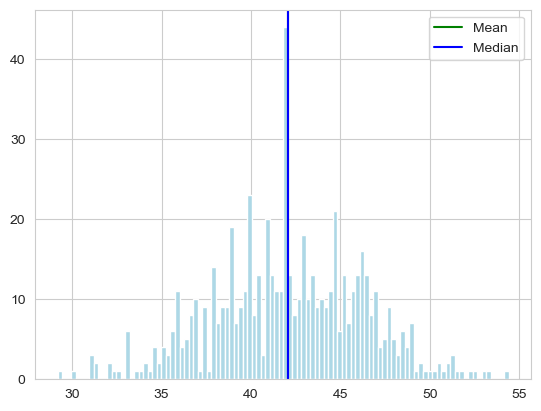


Skewness of ALB
-----------------------------
Skewness:  -0.11936403177006384

Central value of  ALP
-----------------------------
Mean:  66.93849918042467
Median:  66.3
Max:  120.2
Min:  11.3
Standard deviation:  19.000121518297128

Boxplot of ALP
-----------------------------


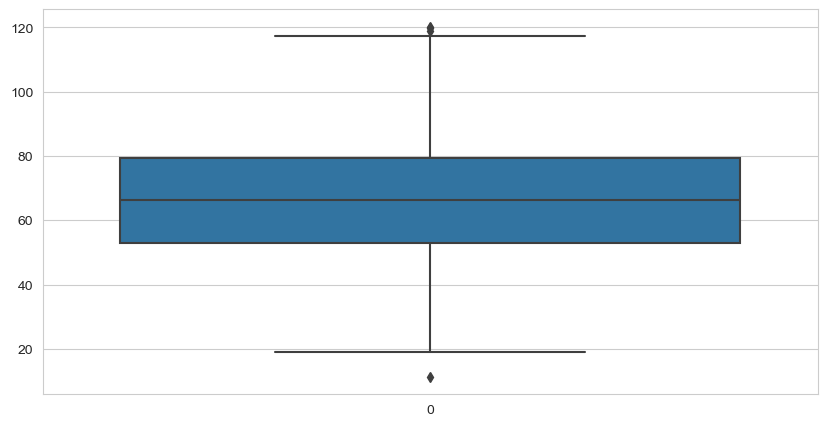


Outliers of ALP
-----------------------------
Quartile 1: 52.95
Quartile 3: 79.3
Interquartile Range (IQR): 26.349999999999994

Outliers detection from interquartile range (IQR) of ALP
-----------------------------
Lower bound:  13.425000000000011
Upper bound:  118.82499999999999
number of outliers in lower: 1
number of outliers in upper: 3
percentage of outliers in lower: 0.16260162601626016%
percentage of outliers in upper: 0.4878048780487805%
Median: 66.3	Mean: 66.93849918042467	Mode: 66.3


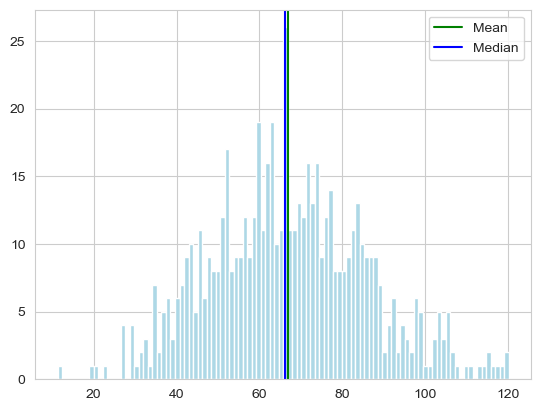


Skewness of ALP
-----------------------------
Skewness:  0.1907465219999434

Central value of  ALT
-----------------------------
Mean:  23.72119147708151
Median:  21.5
Max:  57.7
Min:  0.9
Standard deviation:  10.86908622521257

Boxplot of ALT
-----------------------------


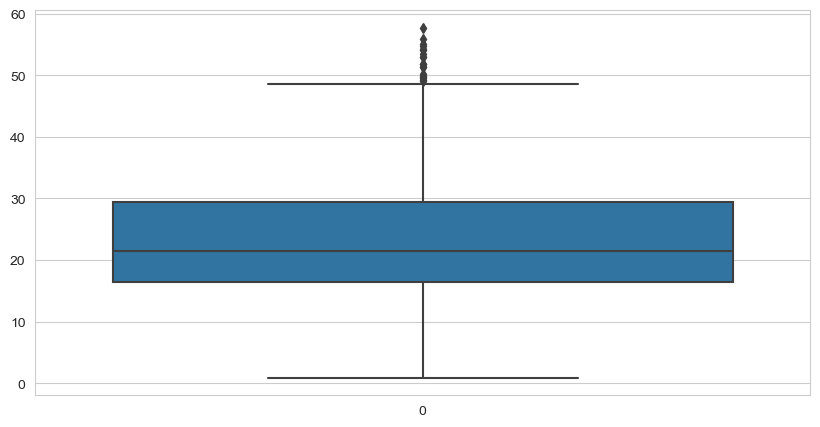


Outliers of ALT
-----------------------------
Quartile 1: 16.4
Quartile 3: 29.4
Interquartile Range (IQR): 13.0

Outliers detection from interquartile range (IQR) of ALT
-----------------------------
Lower bound:  -3.1000000000000014
Upper bound:  48.9
number of outliers in lower: 0
number of outliers in upper: 19
percentage of outliers in lower: 0.0%
percentage of outliers in upper: 3.089430894308943%
Median: 21.5	Mean: 23.72119147708151	Mode: 21.5


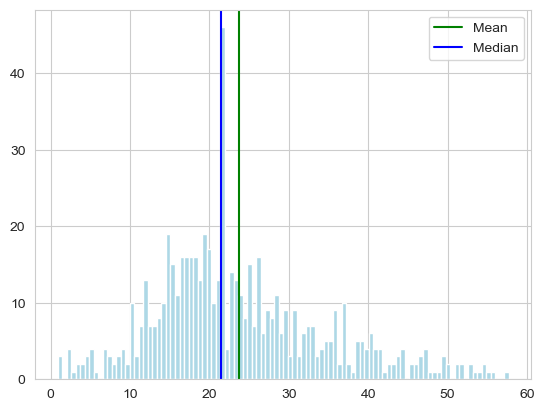


Skewness of ALT
-----------------------------
Skewness:  0.6977943963103468

Central value of  AST
-----------------------------
Mean:  26.08211382113821
Median:  25.0
Max:  49.3
Min:  10.6
Standard deviation:  6.834421793932681

Boxplot of AST
-----------------------------


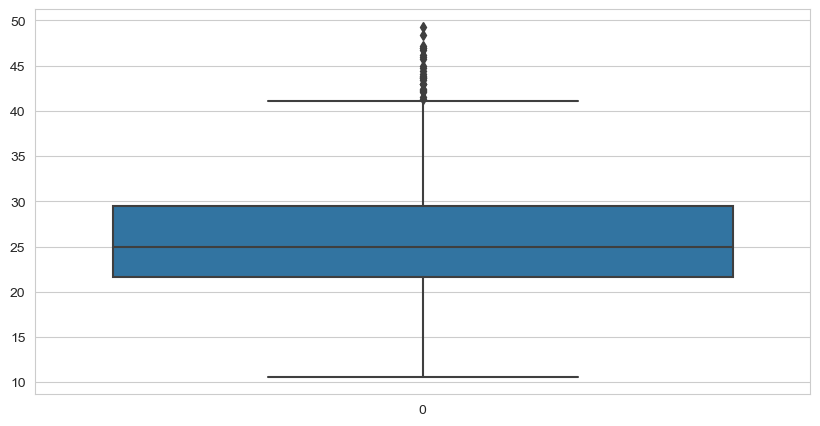


Outliers of AST
-----------------------------
Quartile 1: 21.6
Quartile 3: 29.45
Interquartile Range (IQR): 7.849999999999998

Outliers detection from interquartile range (IQR) of AST
-----------------------------
Lower bound:  9.825000000000005
Upper bound:  41.224999999999994
number of outliers in lower: 0
number of outliers in upper: 27
percentage of outliers in lower: 0.0%
percentage of outliers in upper: 4.390243902439025%
Median: 25.0	Mean: 26.08211382113821	Mode: 25.0


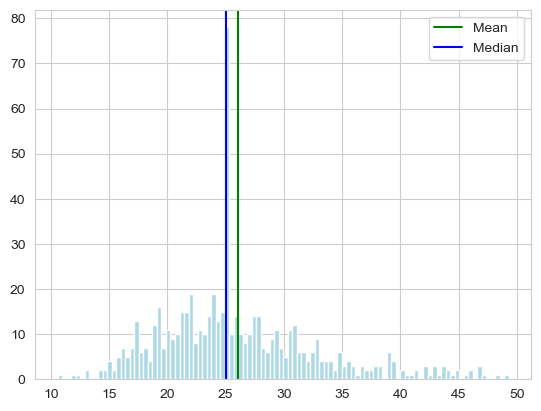


Skewness of AST
-----------------------------
Skewness:  0.8732439065380168

Central value of  BIL
-----------------------------
Mean:  7.878292682926829
Median:  6.95
Max:  20.0
Min:  0.8
Standard deviation:  3.8750596732438103

Boxplot of BIL
-----------------------------


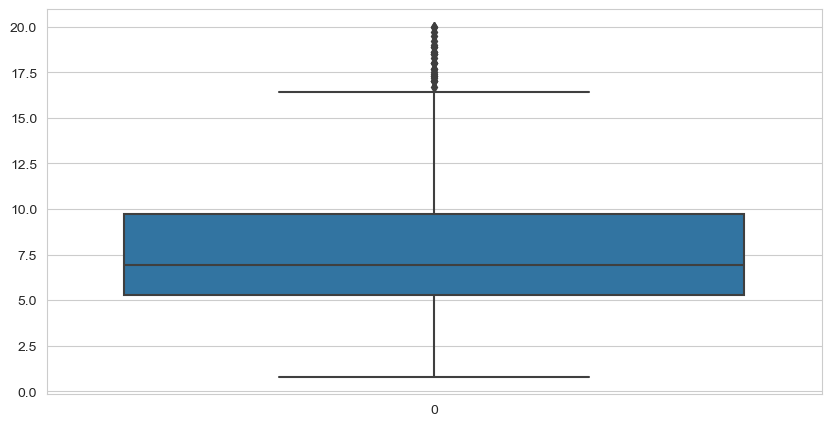


Outliers of BIL
-----------------------------
Quartile 1: 5.3
Quartile 3: 9.75
Interquartile Range (IQR): 4.45

Outliers detection from interquartile range (IQR) of BIL
-----------------------------
Lower bound:  -1.3750000000000009
Upper bound:  16.425
number of outliers in lower: 0
number of outliers in upper: 28
percentage of outliers in lower: 0.0%
percentage of outliers in upper: 4.5528455284552845%
Median: 6.95	Mean: 7.878292682926829	Mode: 6.95


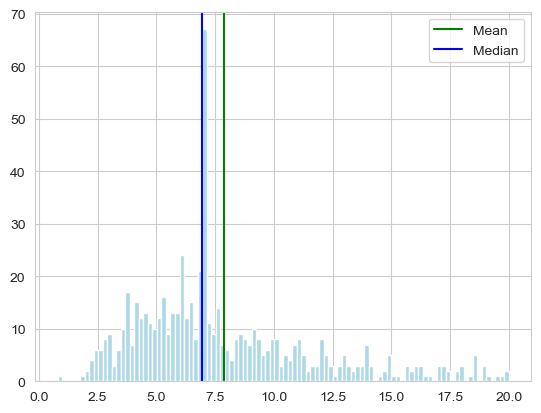


Skewness of BIL
-----------------------------
Skewness:  1.04936050186899

Central value of  CHE
-----------------------------
Mean:  8.237138211382113
Median:  8.27
Max:  13.3
Min:  3.29
Standard deviation:  1.795797375475732

Boxplot of CHE
-----------------------------


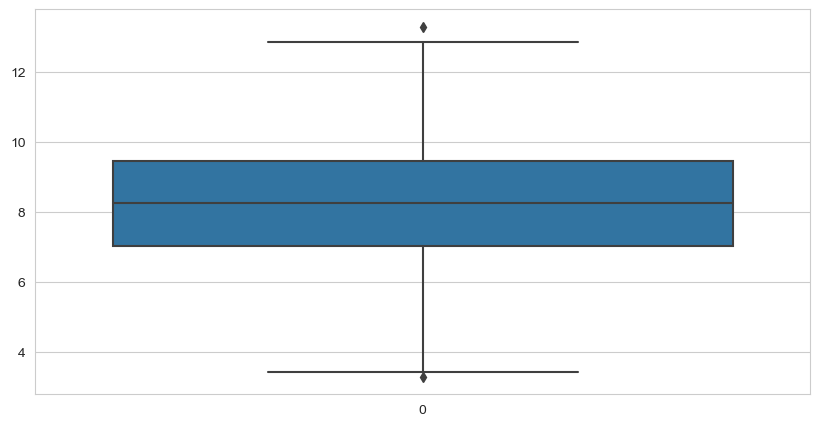


Outliers of CHE
-----------------------------
Quartile 1: 7.029999999999999
Quartile 3: 9.465
Interquartile Range (IQR): 2.4350000000000005

Outliers detection from interquartile range (IQR) of CHE
-----------------------------
Lower bound:  3.3774999999999986
Upper bound:  13.1175
number of outliers in lower: 1
number of outliers in upper: 1
percentage of outliers in lower: 0.16260162601626016%
percentage of outliers in upper: 0.16260162601626016%
Median: 8.27	Mean: 8.237138211382113	Mode: 8.27


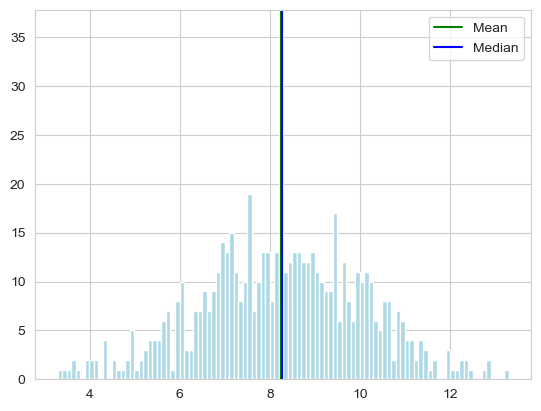


Skewness of CHE
-----------------------------
Skewness:  -0.0984450375840337

Central value of  CHOL
-----------------------------
Mean:  5.323724596086646
Median:  5.3
Max:  8.11
Min:  2.61
Standard deviation:  1.0121616098874555

Boxplot of CHOL
-----------------------------


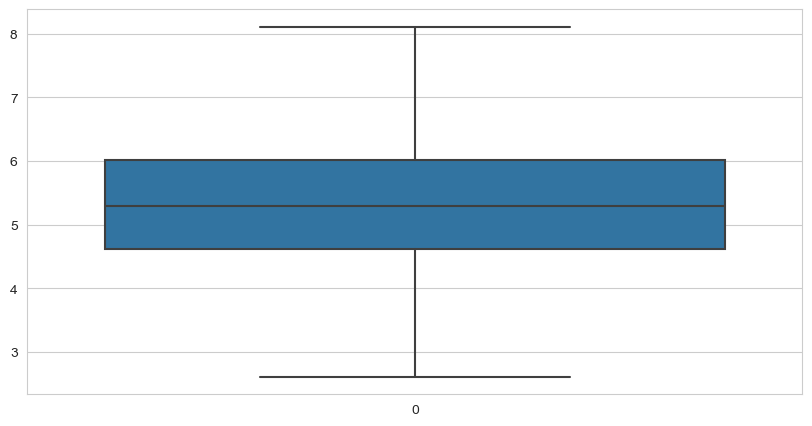


Outliers of CHOL
-----------------------------
Quartile 1: 4.625
Quartile 3: 6.02
Interquartile Range (IQR): 1.3949999999999996

Outliers detection from interquartile range (IQR) of CHOL
-----------------------------
Lower bound:  2.5325000000000006
Upper bound:  8.112499999999999
number of outliers in lower: 0
number of outliers in upper: 0
percentage of outliers in lower: 0.0%
percentage of outliers in upper: 0.0%
Median: 5.3	Mean: 5.323724596086646	Mode: 5.3


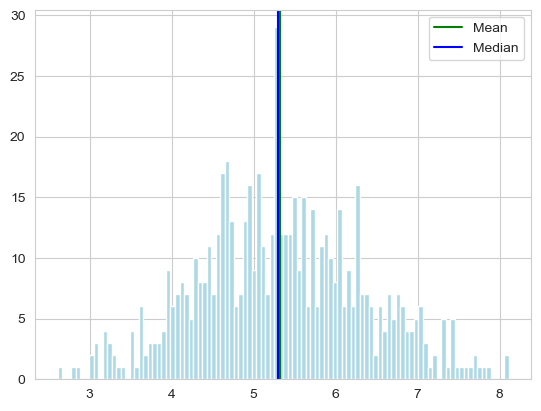


Skewness of CHOL
-----------------------------
Skewness:  0.10311525591942759

Central value of  CREA
-----------------------------
Mean:  78.0679674796748
Median:  76.7
Max:  119.0
Min:  40.0
Standard deviation:  14.211794830760978

Boxplot of CREA
-----------------------------


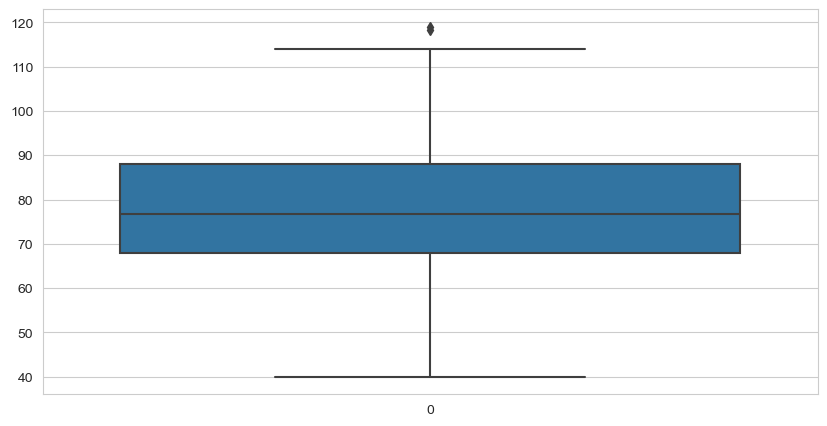


Outliers of CREA
-----------------------------
Quartile 1: 68.0
Quartile 3: 88.0
Interquartile Range (IQR): 20.0

Outliers detection from interquartile range (IQR) of CREA
-----------------------------
Lower bound:  38.0
Upper bound:  118.0
number of outliers in lower: 0
number of outliers in upper: 2
percentage of outliers in lower: 0.0%
percentage of outliers in upper: 0.3252032520325203%
Median: 76.7	Mean: 78.0679674796748	Mode: 74.0


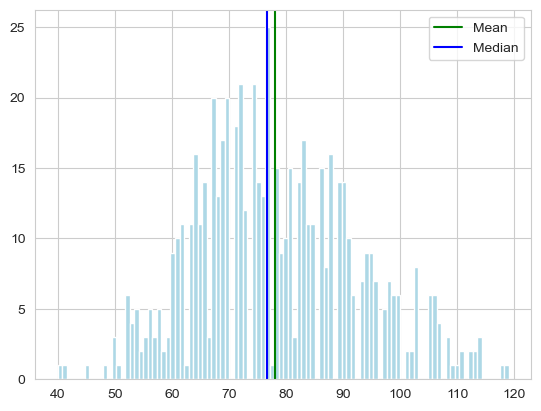


Skewness of CREA
-----------------------------
Skewness:  0.31870835987075774

Central value of  GGT
-----------------------------
Mean:  25.734878048780487
Median:  21.55
Max:  76.9
Min:  4.5
Standard deviation:  14.989885534863037

Boxplot of GGT
-----------------------------


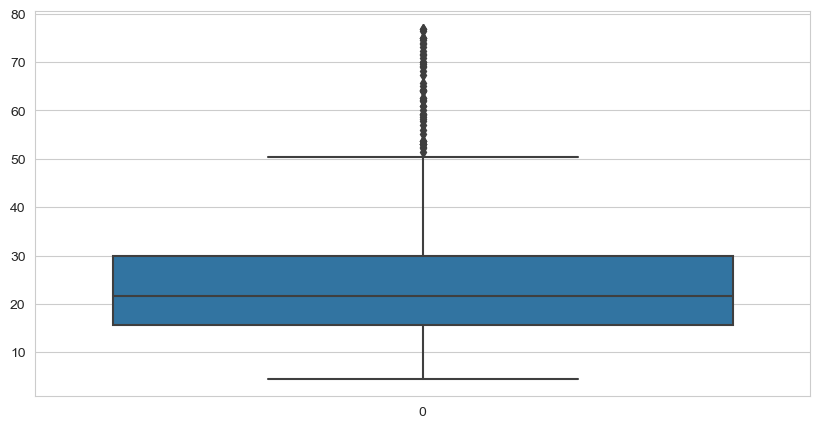


Outliers of GGT
-----------------------------
Quartile 1: 15.7
Quartile 3: 29.9
Interquartile Range (IQR): 14.2

Outliers detection from interquartile range (IQR) of GGT
-----------------------------
Lower bound:  -5.599999999999998
Upper bound:  51.199999999999996
number of outliers in lower: 0
number of outliers in upper: 53
percentage of outliers in lower: 0.0%
percentage of outliers in upper: 8.617886178861788%
Median: 21.55	Mean: 25.734878048780487	Mode: 21.55


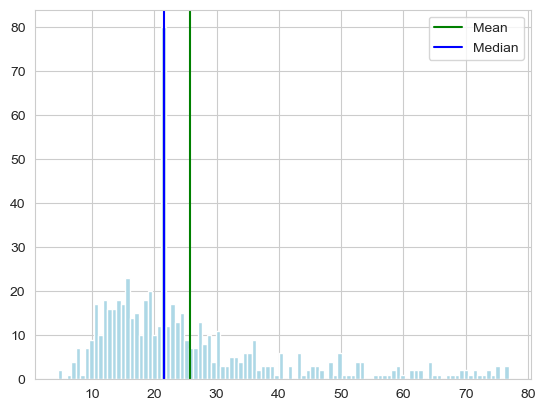


Skewness of GGT
-----------------------------
Skewness:  1.5541270514792975

Central value of  PROT
-----------------------------
Mean:  72.46215405324331
Median:  72.3
Max:  84.0
Min:  60.5
Standard deviation:  4.275976458406102

Boxplot of PROT
-----------------------------


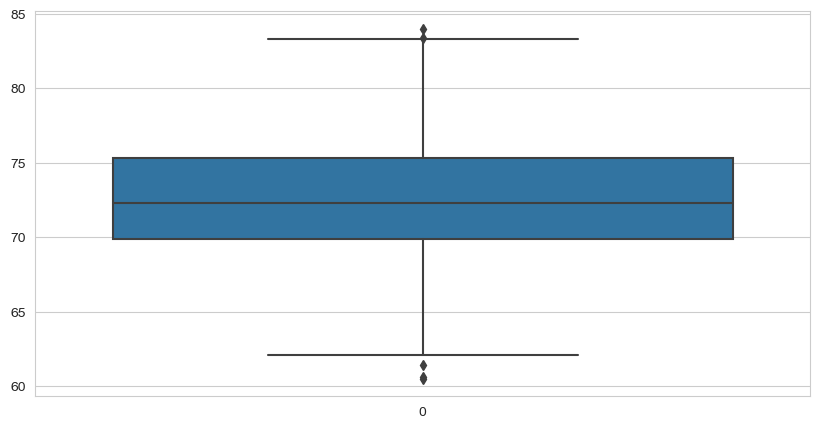


Outliers of PROT
-----------------------------
Quartile 1: 69.9
Quartile 3: 75.3
Interquartile Range (IQR): 5.3999999999999915

Outliers detection from interquartile range (IQR) of PROT
-----------------------------
Lower bound:  61.80000000000002
Upper bound:  83.39999999999998
number of outliers in lower: 3
number of outliers in upper: 2
percentage of outliers in lower: 0.4878048780487805%
percentage of outliers in upper: 0.3252032520325203%
Median: 72.3	Mean: 72.46215405324331	Mode: 72.3


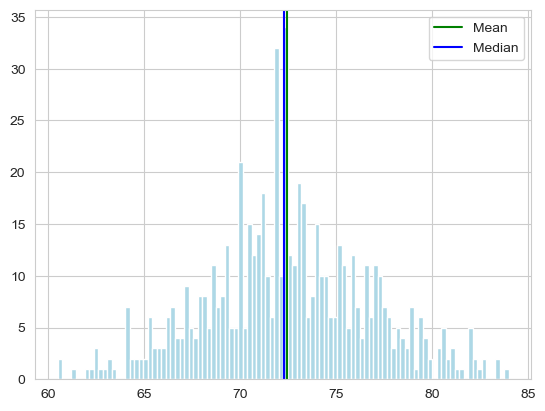


Skewness of PROT
-----------------------------
Skewness:  0.0316298023698173


In [94]:
for col in data3.columns:
    univariateAnalysis_(col, data3)

In [95]:
data3.describe()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,47.359350,0.613008,42.065063,66.938499,23.721191,26.082114,7.878293,8.237138,5.323725,78.067967,25.734878,72.462154
std,9.983829,0.487458,4.216063,19.000122,10.869086,6.834422,3.875060,1.795797,1.012162,14.211795,14.989886,4.275976
min,19.000000,0.000000,29.200000,11.300000,0.900000,10.600000,0.800000,3.290000,2.610000,40.000000,4.500000,60.500000
25%,39.000000,0.000000,39.200000,52.950000,16.400000,21.600000,5.300000,7.030000,4.625000,68.000000,15.700000,69.900000
50%,47.000000,1.000000,42.050000,66.300000,21.500000,25.000000,6.950000,8.270000,5.300000,76.700000,21.550000,72.300000
75%,54.000000,1.000000,45.100000,79.300000,29.400000,29.450000,9.750000,9.465000,6.020000,88.000000,29.900000,75.300000
max,76.000000,1.000000,54.400000,120.200000,57.700000,49.300000,20.000000,13.300000,8.110000,119.000000,76.900000,84.000000


**Membuat dataframe baru yang merupakan hasil dari imputasi median**

In [98]:
#data3.to_csv('new hcv data imputed.csv')